In [1]:
import os
import glob
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

cameras = [
    ["CAM02009CCTV7.jpg", 
     "I-80 Eastbound Exit 161 Bellefonte Interchange (I-80 & I-99)","no change",40.944571,-77.720918],
    ["CAM02001CCTV2.jpg", 
     "Port Matilda US-322 By-Pass Westbound","changed 4/27",40.810961,-78.075259],
    ["CAM02010CCTV11.jpg", 
     "Port Matilda I-99 Exit 61 Median","no change",40.803880,-78.063664],
    ["CAM02005CCTV9.jpg", 
     "Milesburg Interchange West I-80 Exit 158 Eastbound / Alt US-220","no change",40.955477,-77.773749],
    ["CAM02006CCTV10.jpg", 
     "Milesburg Interchange East I-80 Exit 158 Westbound / PA-150","changed 4/27",40.956061,-77.766277],
    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817],
    ["CAM02002CCTV3.jpg",
     "Grays Woods","changed 5/3",40.817144,-77.939841],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["CAM02046CCTV52.jpg",
     "I-99 at Exit 71 (Toftrees)","changed 5/5",40.817953,-77.900271],
    ["CAM02033CCTV38.jpg",
     "Snowshoe I-80 Exit 147","no change",41.022703,-77.933981],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
        ["ytbeaver",
     "beaver.","no change",40.804483,-77.864219],
            ["ytcollege",
     "college","no change",40.804483,-77.864219],
    ]

camera_subset = [

    ["CAM02028CCTV32.jpg",
     "Atherton and Valley Vista","no change",40.812073,-77.922500],
    ["CAM02037CCTV43.jpg",
     "Atherton and Vairo","no change",40.807936,-77.895204],
    ["CAM02038CCTV44.jpg",
     "Atherton and North Hills","no change",40.805031,-77.886886],
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["CAM02003CCTV4.jpg",
     "I-99/US-322 Interchange","changed 5/1",40.828613,-77.840339],
    ["CAM02007CCTV13.jpg",
     "US-322 E/O PA-26","changed 5/4",40.795773,-77.820937],
    ["collegeTwp.jpg",
     "College Township Traffic camera","no change",40.811564,-77.830719],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219]
    ]

camera_subsetx = [
    

  
    ["CAM02039CCTV45.jpg",
     "Atherton and Park","no change",40.796522,-77.872549],
    ["CAM02040CCTV46.jpg",
     "Atherton and W.College","changed 5/2",40.791787,-77.864971],
    ["CAM02042CCTV49.jpg",
     "Atherton and W.Beaver","changed 5/2-5/4, then returned",40.790894,-77.863812],
    ["parkArboretum.jpg",
     "PSU Park Ave.","no change",40.804483,-77.864219],
    
    ["CAM02020CCTV24.jpg",
     "Benner Pike","changed 5/6-5/7, then returned",40.829048,-77.804817]
]

camdfs = pd.DataFrame(cameras,columns = ['ID','Description','status','Latitude','Longitude'])
camdfs[['ID','Description','status']]

ID                                        Description  \
0    CAM02009CCTV7.jpg  I-80 Eastbound Exit 161 Bellefonte Interchange...   
1    CAM02001CCTV2.jpg              Port Matilda US-322 By-Pass Westbound   
2   CAM02010CCTV11.jpg                   Port Matilda I-99 Exit 61 Median   
3    CAM02005CCTV9.jpg  Milesburg Interchange West I-80 Exit 158 Eastb...   
4   CAM02006CCTV10.jpg  Milesburg Interchange East I-80 Exit 158 Westb...   
5   CAM02028CCTV32.jpg                          Atherton and Valley Vista   
6   CAM02037CCTV43.jpg                                 Atherton and Vairo   
7   CAM02038CCTV44.jpg                           Atherton and North Hills   
8   CAM02039CCTV45.jpg                                  Atherton and Park   
9   CAM02040CCTV46.jpg                             Atherton and W.College   
10  CAM02042CCTV49.jpg                              Atherton and W.Beaver   
11   CAM02003CCTV4.jpg                            I-99/US-322 Interchange   
12  CAM02020CCTV24.jpg                                        Benner Pike   
13   CAM02002CCTV3.jpg                                        Grays Woods   
14  CAM02007CCTV13.jpg                                   US-322 E/O PA-26   
15  CAM02046CCTV52.jpg                         I-99 at Exit 71 (Toftrees)   
16  CAM02033CCTV38.jpg                             Snowshoe I-80 Exit 147   
17      collegeTwp.jpg                    College Township Traffic camera   
18   parkArboretum.jpg                                      PSU Park Ave.   
19            ytbeaver                                            beaver.   
20           ytcollege                                            college   

                            status  
0                        no change  
1                     changed 4/27  
2                        no change  
3                        no change  
4                     changed 4/27  
5                        no change  
6                        no change  
7                        no change  
8                        no change  
9                      changed 5/2  
10  changed 5/2-5/4, then returned  
11                     changed 5/1  
12  changed 5/6-5/7, then returned  
13                     changed 5/3  
14                     changed 5/4  
15                     changed 5/5  
16                       no change  
17                       no change  
18                       no change  
19                       no change  
20                       no change

In [2]:
date = "062722"

In [3]:
# Loading all camera data...

#xdf = pd.read_csv("/home/ubuntu/nitelite/full_vehicles_427-615-partial-all-cameras.csv")
xdf = pd.read_csv(f"allcams{date}.csv")
xdf['datetime_EST'] = pd.to_datetime(xdf['datetime_EST'])
xdf.sort_values(by='datetime_EST')



datetime_UTC  \
0         2020-04-27 00:00:02   
1         2020-04-27 00:00:05   
2         2020-04-27 00:00:08   
3         2020-04-27 00:00:10   
4         2020-04-27 00:00:12   
...                       ...   
31523301  2022-06-27 13:02:26   
31523302  2022-06-27 13:02:28   
31523303  2022-06-27 13:02:30   
31523304  2022-06-27 13:02:32   
31523305  2022-06-27 13:02:34   

                                                 image_file  vehicle_count  \
0         /home/ubuntu/cams1/20200427_000002_CAM02033CCT...              0   
1         /home/ubuntu/cams1/20200427_000005_collegeTwp.jpg              2   
2         /home/ubuntu/cams1/20200427_000008_CAM02028CCT...              1   
3         /home/ubuntu/cams1/20200427_000010_CAM02037CCT...              3   
4         /home/ubuntu/cams1/20200427_000012_CAM02038CCT...              0   
...                                                     ...            ...   
31523301  /home/ubuntu/camse49/CAM02020CCTV24/20220627/2...              2   
31523302  /home/ubuntu/camse49/CAM02002CCTV3/20220627/20...              2   
31523303  /home/ubuntu/camse49/CAM02007CCTV13/20220627/2...              0   
31523304  /home/ubuntu/camse49/CAM02046CCTV52/20220627/2...              0   
31523305  /home/ubuntu/camse49/CAM02009CCTV7/20220627/20...              0   

                datetime_EST     camera_name  
0        2020-04-26 20:00:02  CAM02033CCTV38  
1        2020-04-26 20:00:05      collegeTwp  
2        2020-04-26 20:00:08  CAM02028CCTV32  
3        2020-04-26 20:00:10  CAM02037CCTV43  
4        2020-04-26 20:00:12  CAM02038CCTV44  
...                      ...             ...  
31523301 2022-06-27 09:02:26  CAM02020CCTV24  
31523302 2022-06-27 09:02:28   CAM02002CCTV3  
31523303 2022-06-27 09:02:30  CAM02007CCTV13  
31523304 2022-06-27 09:02:32  CAM02046CCTV52  
31523305 2022-06-27 09:02:34   CAM02009CCTV7  

[31523306 rows x 5 columns]

In [4]:
print(len(xdf))

31523306


In [5]:
icdf = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdf.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdf.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]

In [6]:
def get_vcc_avg(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/60.0))
    return(rv)

def get_vcc_avg_daily(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 60.0)))
    return(rv)

def get_vcc_avg_weekly(row):
    rv = 0.0
    if row.image_count > 0:
        rv = (float(row.vehicle_count_sum) / (float(row.image_count)/(24.0 * 7.0 * 60.0)))
    return(rv)  

In [7]:
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [8]:
icdfcvc.to_csv(f"vehicle_avg_per_hour_each_camera_427-{date}.csv",index=False)

/home/ubuntu/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


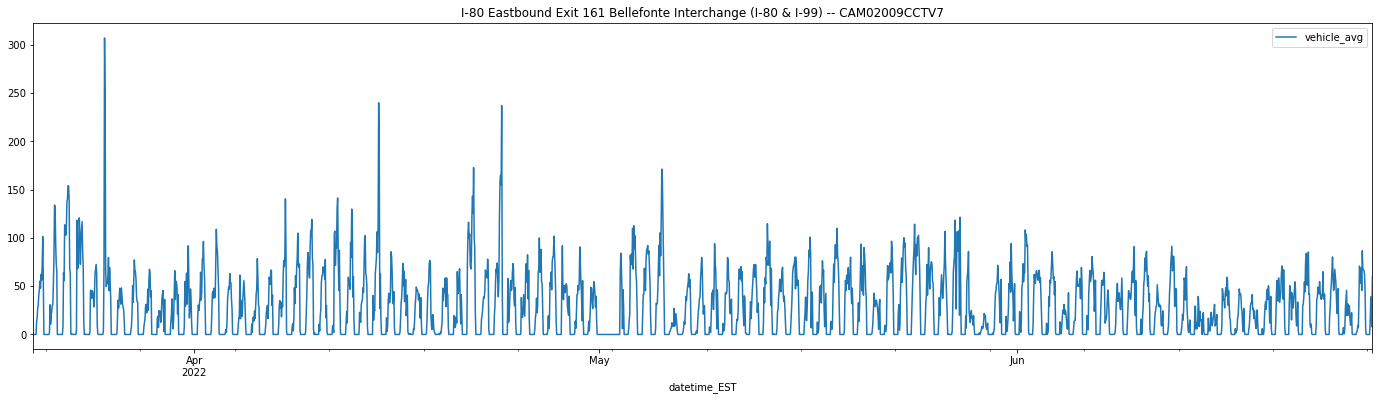

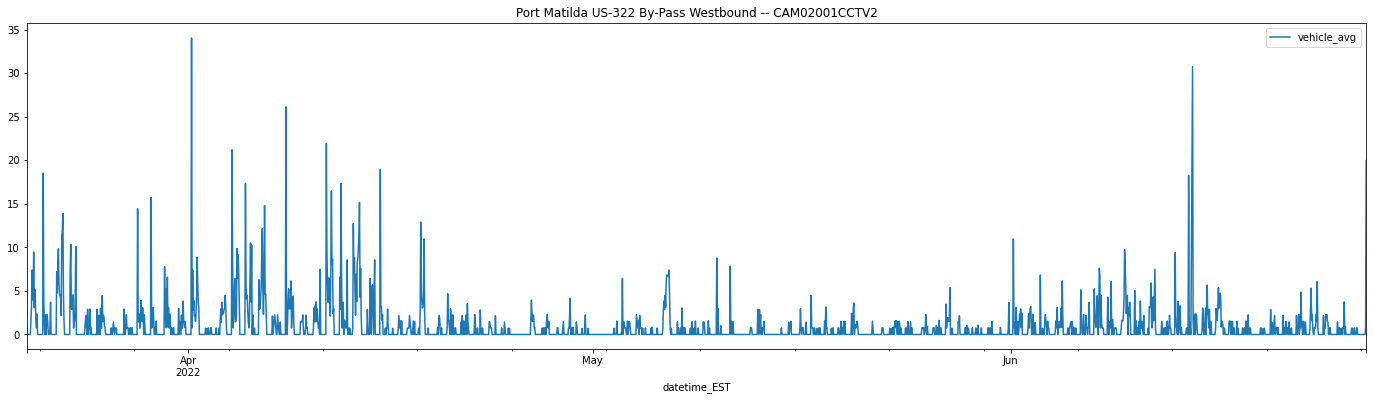

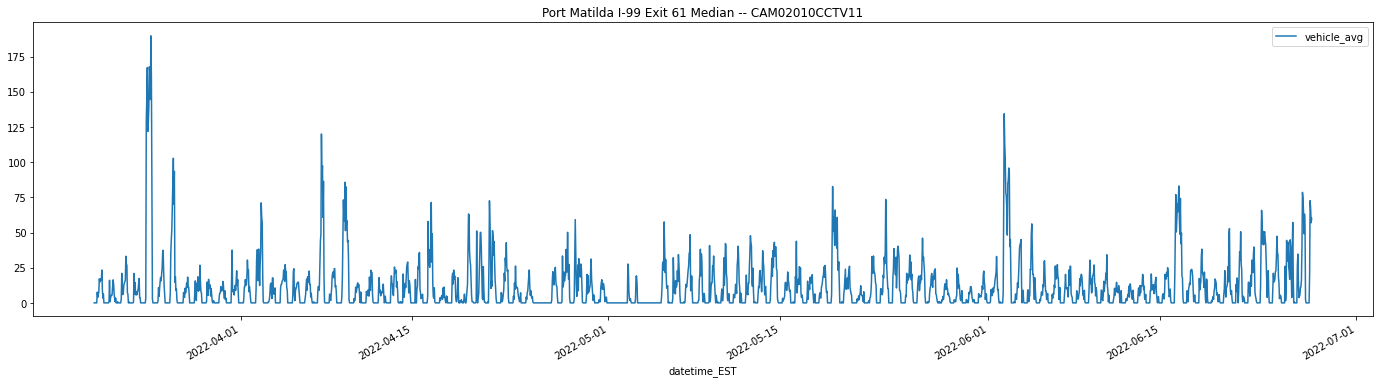

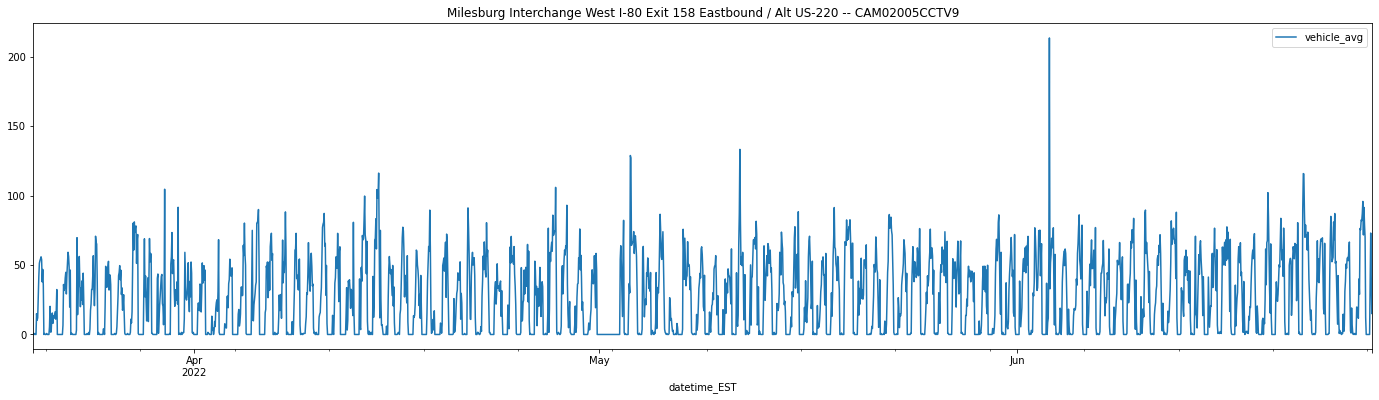

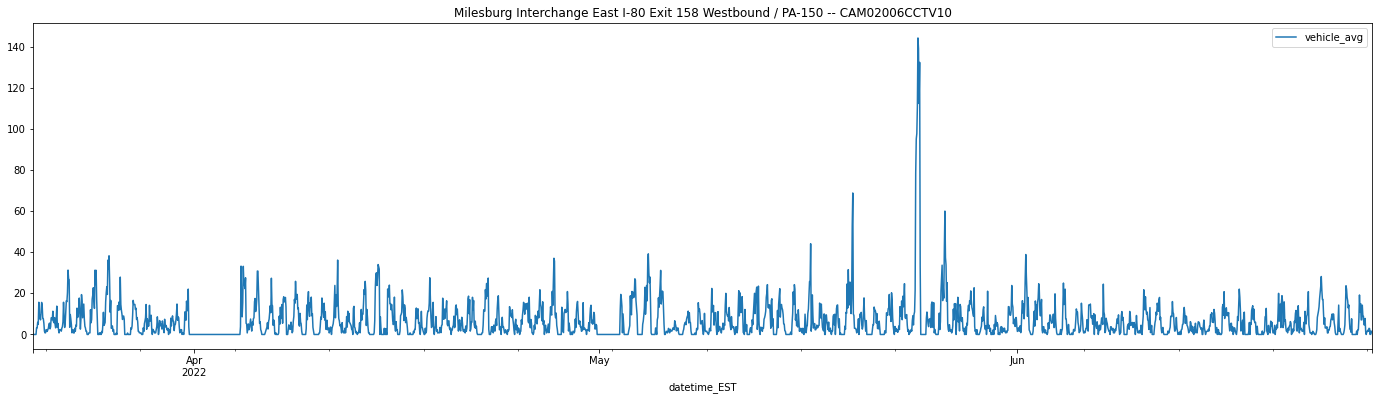

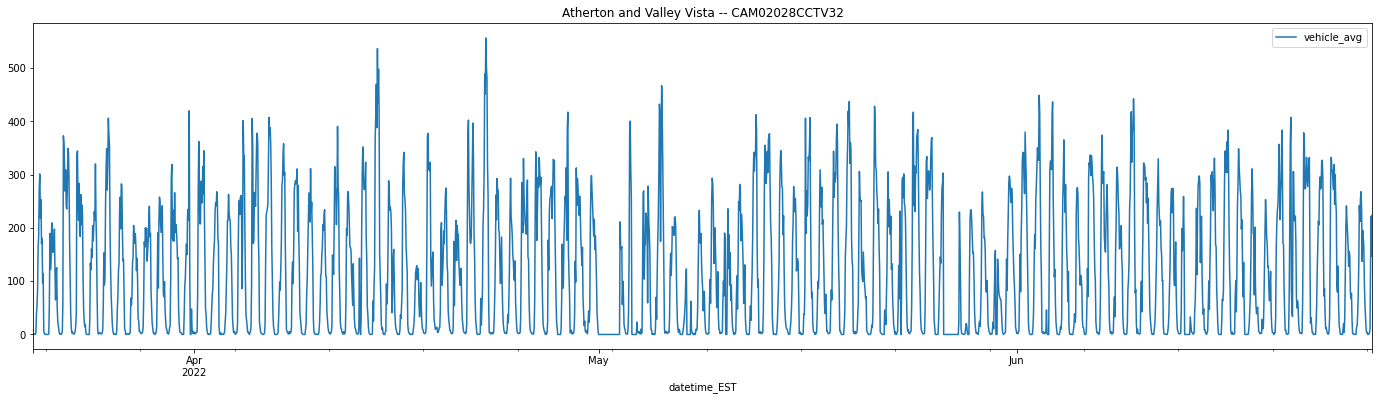

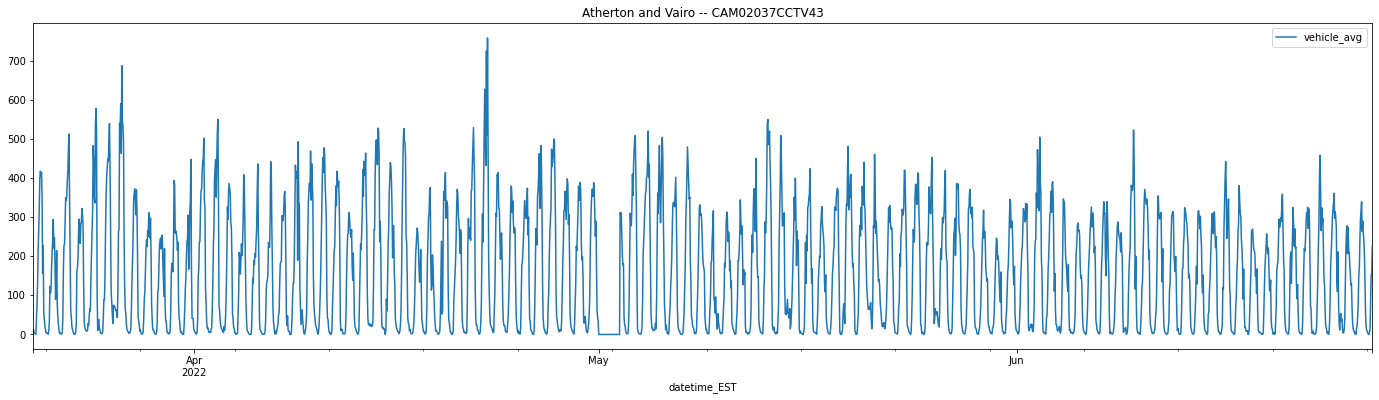

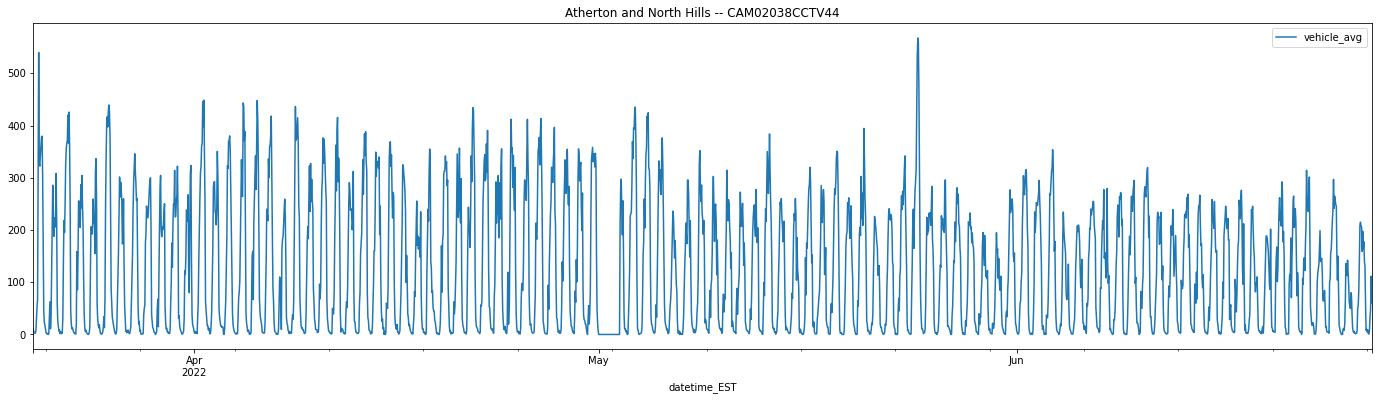

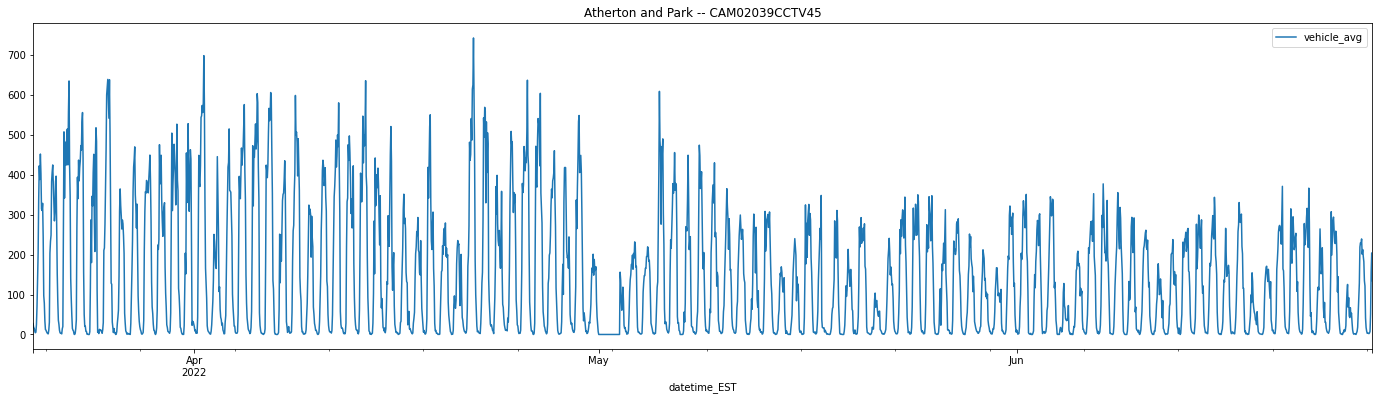

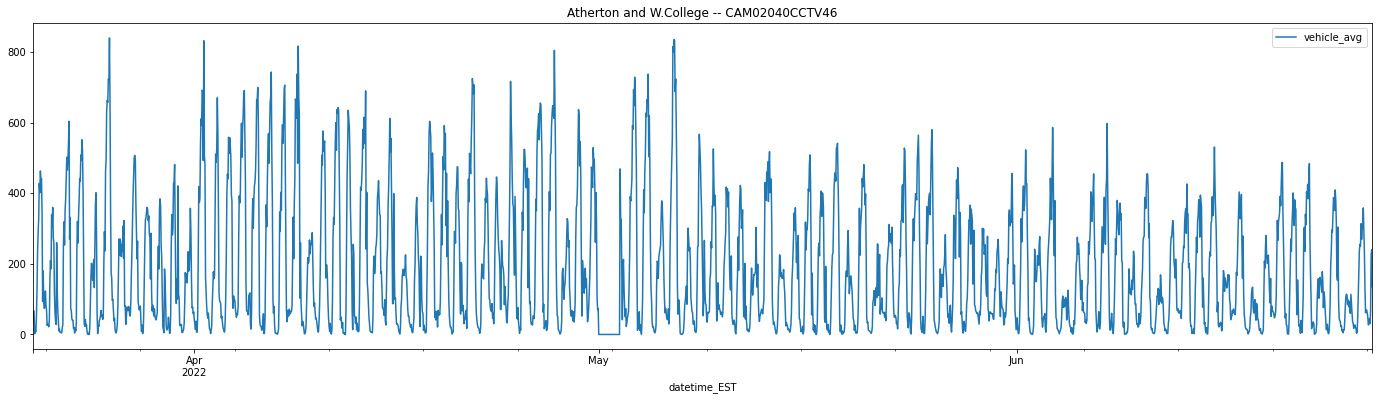

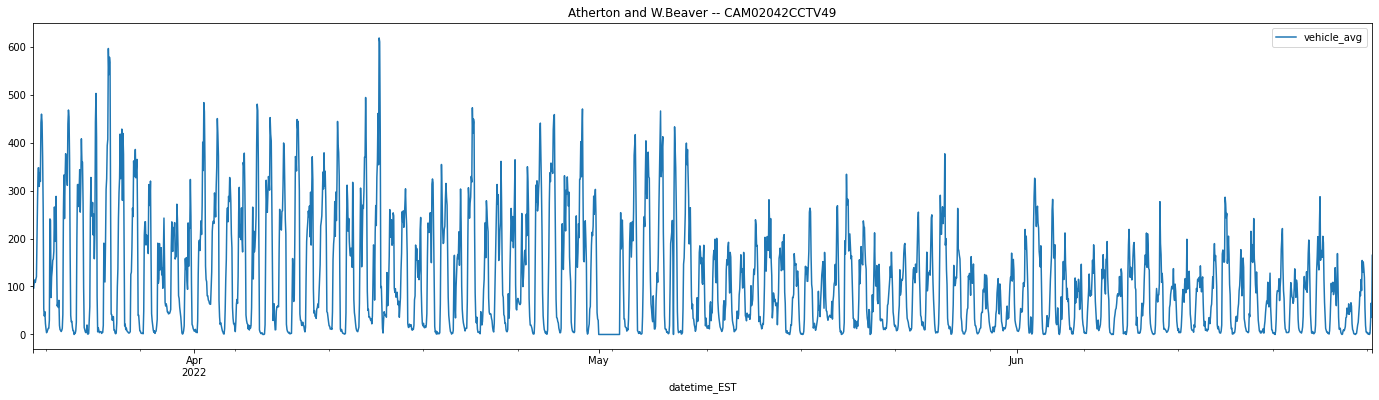

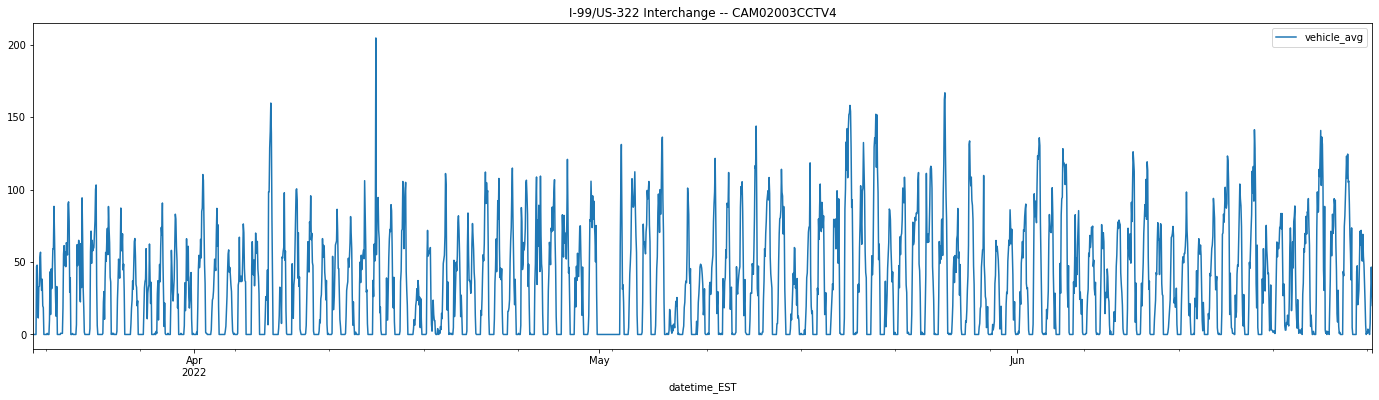

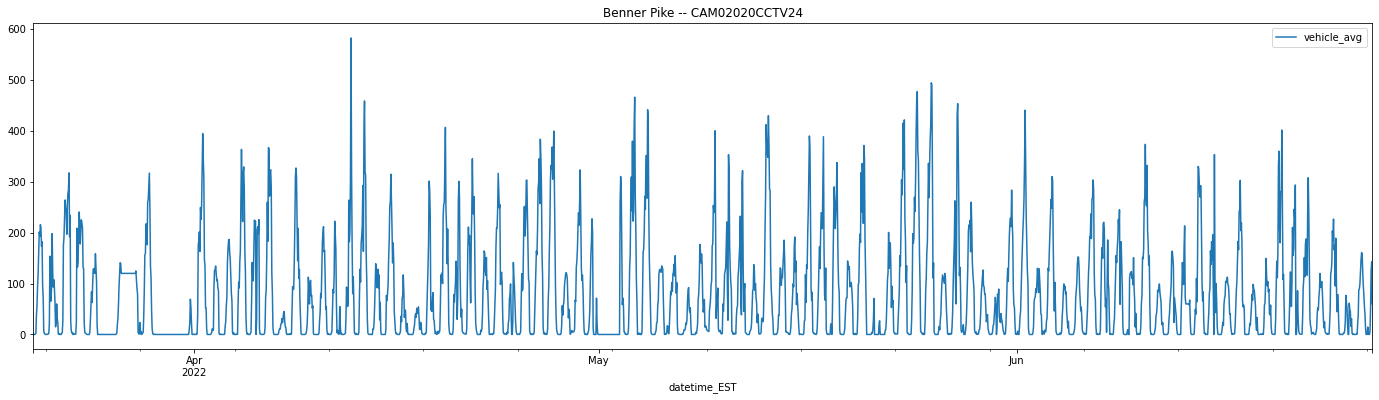

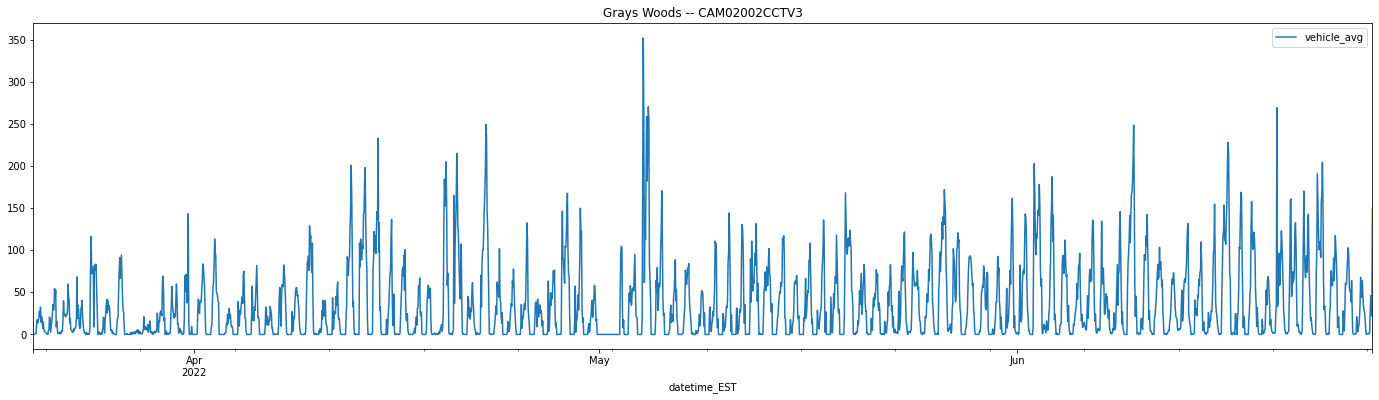

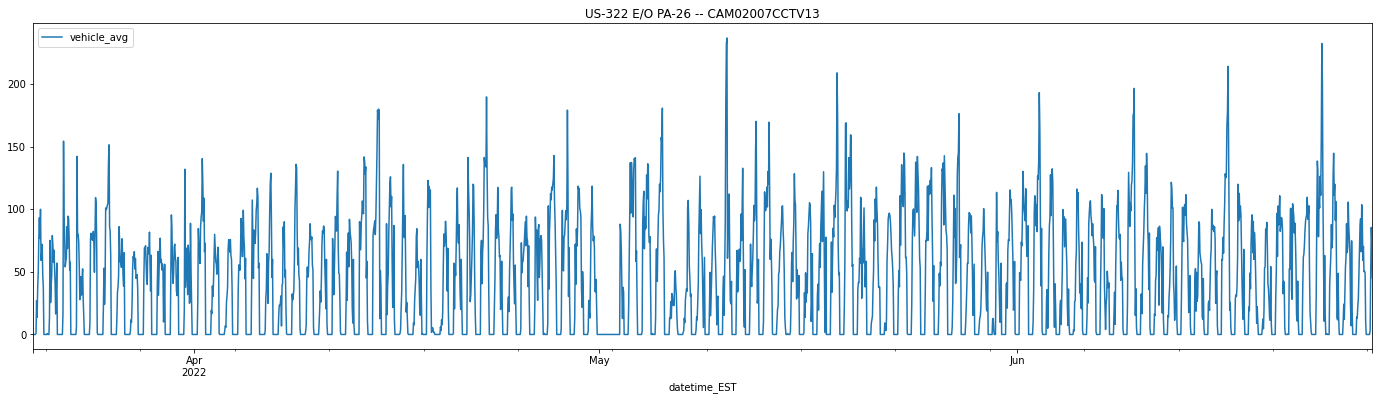

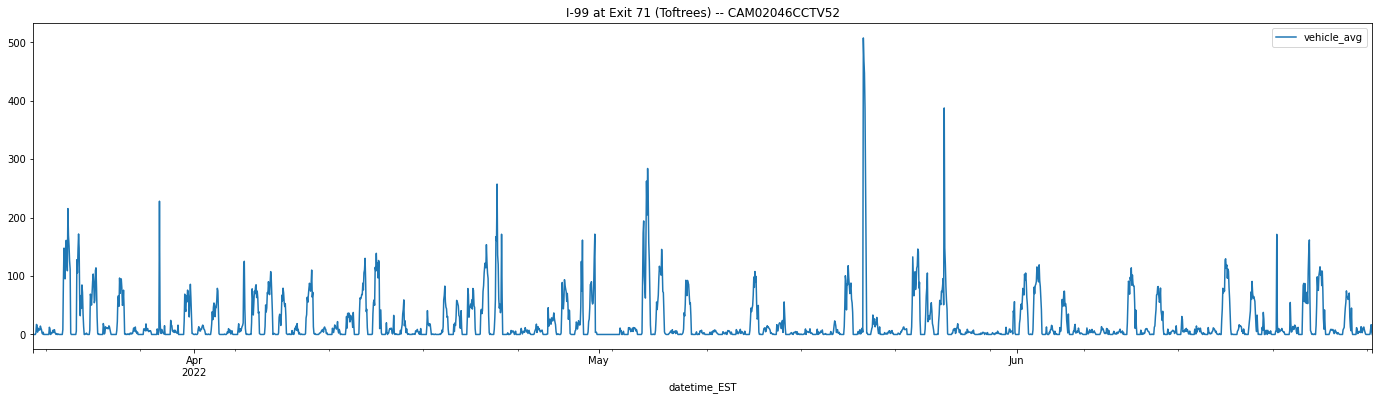

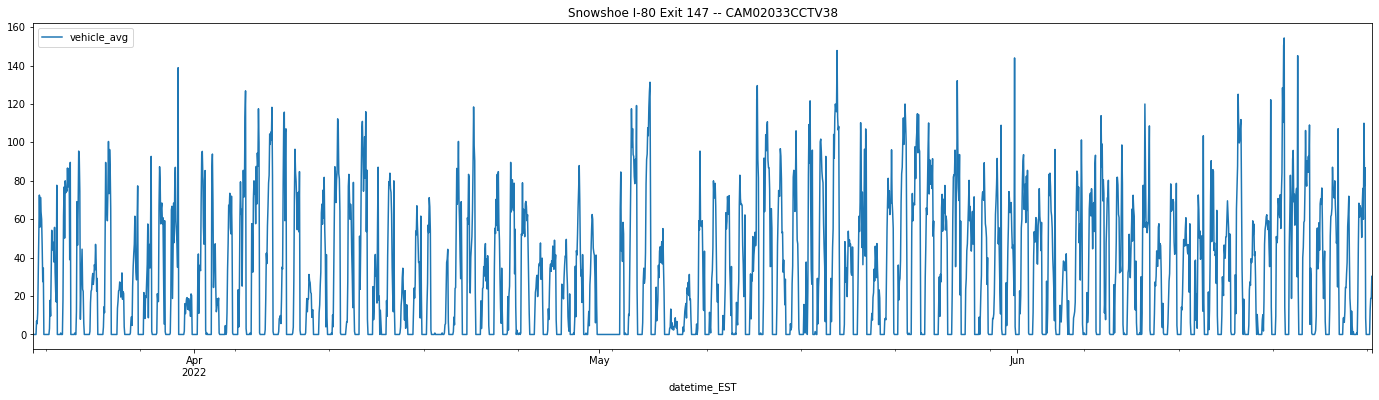

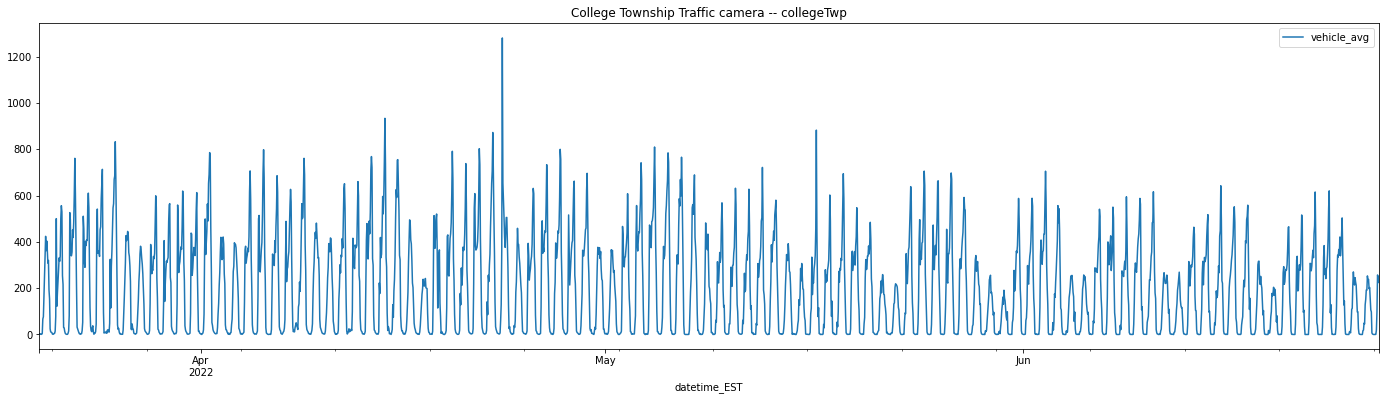

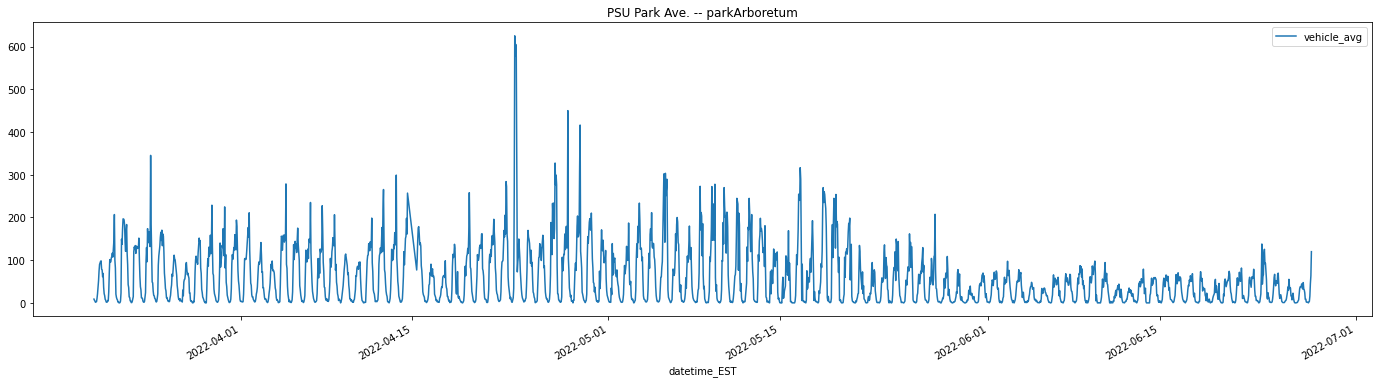

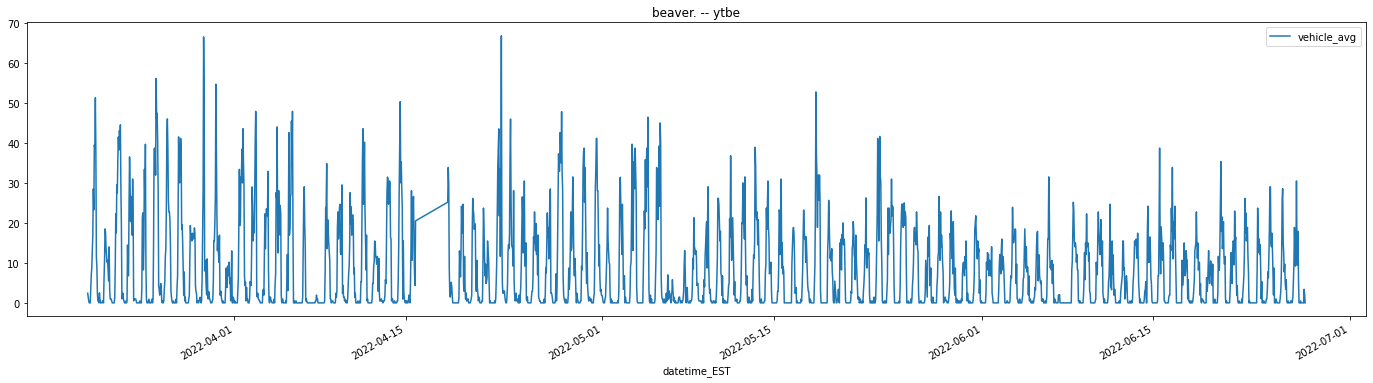

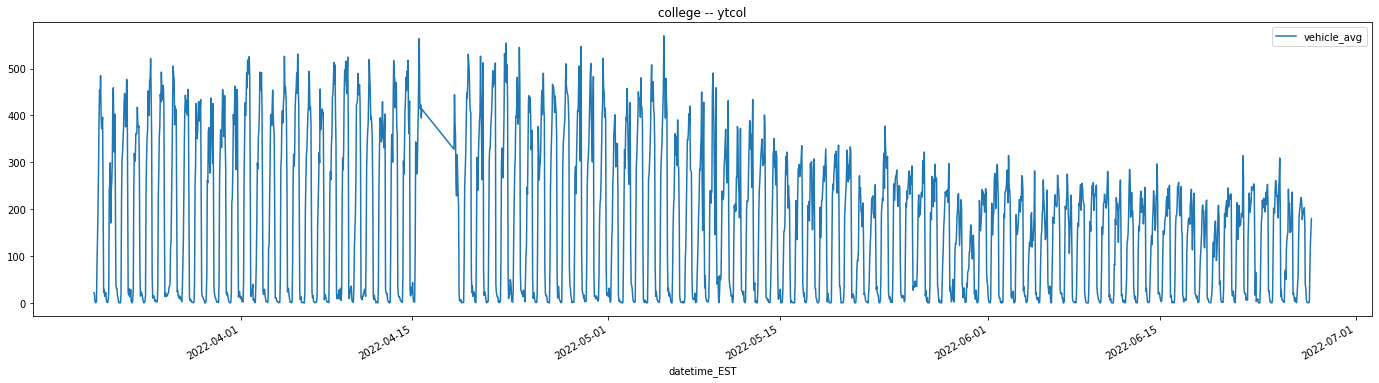

In [9]:
for c in cameras:
    cn = c[0][:-4]
    fdf_twp = icdfcvc[icdfcvc['camera_name'].str.contains(cn)].copy()
    
    fdf_twp['datetime_EST'] = pd.to_datetime(fdf_twp['datetime_EST'])
    fdf_twp.sort_values(by='datetime_EST')
    sds = fdf_twp[(fdf_twp['datetime_EST'] > '2022-03-20 00:00:00')]
    ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(24,6),title=f"{c[1]} -- {cn}")

In [10]:
# drop frozen images from Benner Pike
# jun 3 12:05:14 jun 5 21:01:59
xdfn = xdf.drop(xdf[(xdf["camera_name"] == "CAM02020CCTV24") & (xdf['datetime_EST'] > '2020-6-3 12:05:14') & (xdf['datetime_EST'] <= '2020-6-5 21:01:59') ].index)

# jun 3 12:05:14 jun 5 21:01:59
xdfn1 = xdfn.drop(xdfn[(xdfn["camera_name"] == "CAM02020CCTV24") & (xdfn['datetime_EST'] > '2020-6-22 12:05:00') & (xdfn['datetime_EST'] <= '2020-6-23 15:50:00') ].index)

print("X")

#xdfn2 = xdfn1#.drop(xdfn1[(xdfn1["camera_name"] == "CAM02020CCTV24") & (xdfn1['datetime_EST'] > '2020-6-28 14:06:00') ].index)

# drop frozen images from Bellefonte exchange:
#(fdft['datetime_EST'] > '2020-8-18 12:04:00') & (fdft['datetime_EST'] < '2020-8-19 16:03:00')
xdfn3 = xdfn1.drop(xdfn1[(xdfn1["camera_name"] == "CAM02009CCTV7") & (xdfn1['datetime_EST'] > '2020-8-18 12:04:00') & (xdfn1['datetime_EST'] < '2020-8-19 16:03:00') ].index)

del xdfn
del xdfn1

xdfn4 = xdfn3.drop(xdfn3[(xdfn3['datetime_EST'] > '2020-9-12 18:00:00') & (xdfn3['datetime_EST'] < '2020-9-13 13:00:00') ].index)

del xdfn3

print("X")


xdfn5 = xdfn4.drop(xdfn4[(xdfn4["camera_name"] == "CAM02020CCTV24") & (xdfn4['datetime_EST'] > '2020-10-10 12:00:00')].index)

del xdfn4
print("X")

xdfn6 = xdfn5.drop(xdfn5[(xdfn5["camera_name"] == "CAM02005CCTV9") & (xdfn5['datetime_EST'] > '2020-11-25 15:00:00') & (xdfn5['datetime_EST'] < '2020-11-27 00:00:00')].index)
del xdfn5
xdfn7 = xdfn6.drop(xdfn6[(xdfn6["camera_name"] == "CAM02020CCTV24") & (xdfn6['datetime_EST'] > '2020-12-07 11:00:00') &  (xdfn6['datetime_EST'] < '2020-12-08 17:00:00')].index)
del xdfn6
print("X")

xdfn7b = xdfn7.drop(xdfn7[(xdfn7["camera_name"] == "CAM02006CCTV10") & (xdfn7['datetime_EST'] > '2021-02-26 16:00:00') &  (xdfn7['datetime_EST'] < '2021-02-27 07:00:00')].index)
del xdfn7
xdfn7c = xdfn7b.drop(xdfn7b[(xdfn7b["camera_name"] == "CAM02020CCTV24") & (xdfn7b['datetime_EST'] > '2021-03-25 09:00:00') &  (xdfn7b['datetime_EST'] < '2021-03-27 06:00:00')].index)
del xdfn7b
print("X")

xdfn7d = xdfn7c.drop(xdfn7c[(xdfn7c["camera_name"] == "CAM02020CCTV24") & (xdfn7c['datetime_EST'] > '2021-11-20 15:00:00') &  (xdfn7c['datetime_EST'] < '2021-11-21 17:00:00')].index)
del xdfn7c
xdfn7e = xdfn7d.drop(xdfn7d[(xdfn7d["camera_name"] == "CAM02020CCTV24") & (xdfn7d['datetime_EST'] > '2021-12-07 15:00:00') &  (xdfn7d['datetime_EST'] < '2021-12-11 7:00:00')].index)
del xdfn7d
print("X")
xdfn7g = xdfn7e.drop(xdfn7e[(xdfn7e["camera_name"] == "CAM02020CCTV24") & (xdfn7e['datetime_EST'] > '2021-12-19 8:00:00') &  (xdfn7e['datetime_EST'] < '2021-12-21 18:00:00')].index)
del xdfn7e
print("X")
xdfn7h = xdfn7g.drop(xdfn7g[(xdfn7g["camera_name"] == "CAM02020CCTV24") & (xdfn7g['datetime_EST'] > '2022-01-06 16:00:00') &  (xdfn7g['datetime_EST'] < '2022-01-08 6:00:00')].index)
print("X")

X
X
X
X
X
X
X
X


In [11]:
print(len(xdf))

31523306


In [12]:
icdf = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name]).size().reset_index(name='image_count')
icdfs = icdf.groupby(['datetime_EST'])['image_count'].sum().reset_index(name='image_sum')
icdfcvc = xdfn7h.groupby([pd.Grouper(key='datetime_EST',freq='H'),xdfn7h.camera_name])['vehicle_count'].sum().reset_index(name='vehicle_count_sum')
icdfcvc['image_count'] = icdf["image_count"]
icdfcvc['vehicle_avg'] = icdfcvc.apply(get_vcc_avg, axis=1)

In [13]:
icdfcn = icdf.groupby(['datetime_EST'])['camera_name']

In [14]:
icdf

datetime_EST     camera_name  image_count
0      2020-04-26 20:00:00   CAM02001CCTV2           13
1      2020-04-26 20:00:00   CAM02002CCTV3           44
2      2020-04-26 20:00:00   CAM02003CCTV4           31
3      2020-04-26 20:00:00  CAM02006CCTV10           19
4      2020-04-26 20:00:00  CAM02007CCTV13           34
...                    ...             ...          ...
358106 2022-06-27 09:00:00  CAM02046CCTV52            2
358107 2022-06-27 09:00:00      collegeTwp            4
358108 2022-06-27 09:00:00   parkArboretum            4
358109 2022-06-27 09:00:00        ytbeaver            5
358110 2022-06-27 09:00:00       ytcollege            6

[358111 rows x 3 columns]

In [15]:
icdfs

datetime_EST  image_sum
0     2020-04-26 20:00:00        960
1     2020-04-26 21:00:00         68
2     2020-04-26 22:00:00        516
3     2020-04-26 23:00:00        794
4     2020-04-27 00:00:00        796
...                   ...        ...
18972 2022-06-27 05:00:00       1758
18973 2022-06-27 06:00:00       1695
18974 2022-06-27 07:00:00       1691
18975 2022-06-27 08:00:00       1664
18976 2022-06-27 09:00:00         72

[18977 rows x 2 columns]

In [16]:
#xdf.set_index('datetime_EST', drop=False, inplace=True)
#df_sampledh = xdf.set_index('datetime_EST').resample('H').sum().reset_index()

xdfn7h.set_index('datetime_EST', drop=False, inplace=True)
df_sampledh = xdfn7h.set_index('datetime_EST').resample('H').sum().reset_index()

In [17]:
merged = df_sampledh.merge(icdfs, on='datetime_EST')

In [18]:
df_sampledh = merged

In [19]:
def get_vc_avg(row):
    rv = 0.0
    if row.image_sum > 0:
        rv = (float(row.vehicle_count) / (float(row.image_sum)/(22.0 * 60.0)))
    return rv   



In [20]:
df_sampledh['vehicle_avg'] = df_sampledh.apply(get_vc_avg, axis=1)

In [21]:
df_sampledh.to_csv(f"vehicle_avg_per_hour_all_cameras_427-{date}.csv",index=False)

In [22]:
def h2i (row):
    return int((row['datetime_EST']).strftime('%H'))

def date2day (row):
    return (row['datetime_EST']).dayofweek

In [23]:
#df_sampledh['Dates'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.date
#df_sampledh['Time'] = pd.to_datetime(df_sampledh['datetime_EST']).dt.time
df_sampledh['ti'] = df_sampledh.apply (lambda row: h2i(row), axis=1)
df_sampledh['dy'] = df_sampledh.apply (lambda row: date2day(row), axis=1)


In [24]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
18972 2022-06-27 05:00:00            336       1758   252.286689   5   0
18973 2022-06-27 06:00:00           1297       1695  1010.053097   6   0
18974 2022-06-27 07:00:00           2381       1691  1858.616203   7   0
18975 2022-06-27 08:00:00           2224       1664  1764.230769   8   0
18976 2022-06-27 09:00:00            122         72  2236.666667   9   0

[18977 rows x 6 columns]

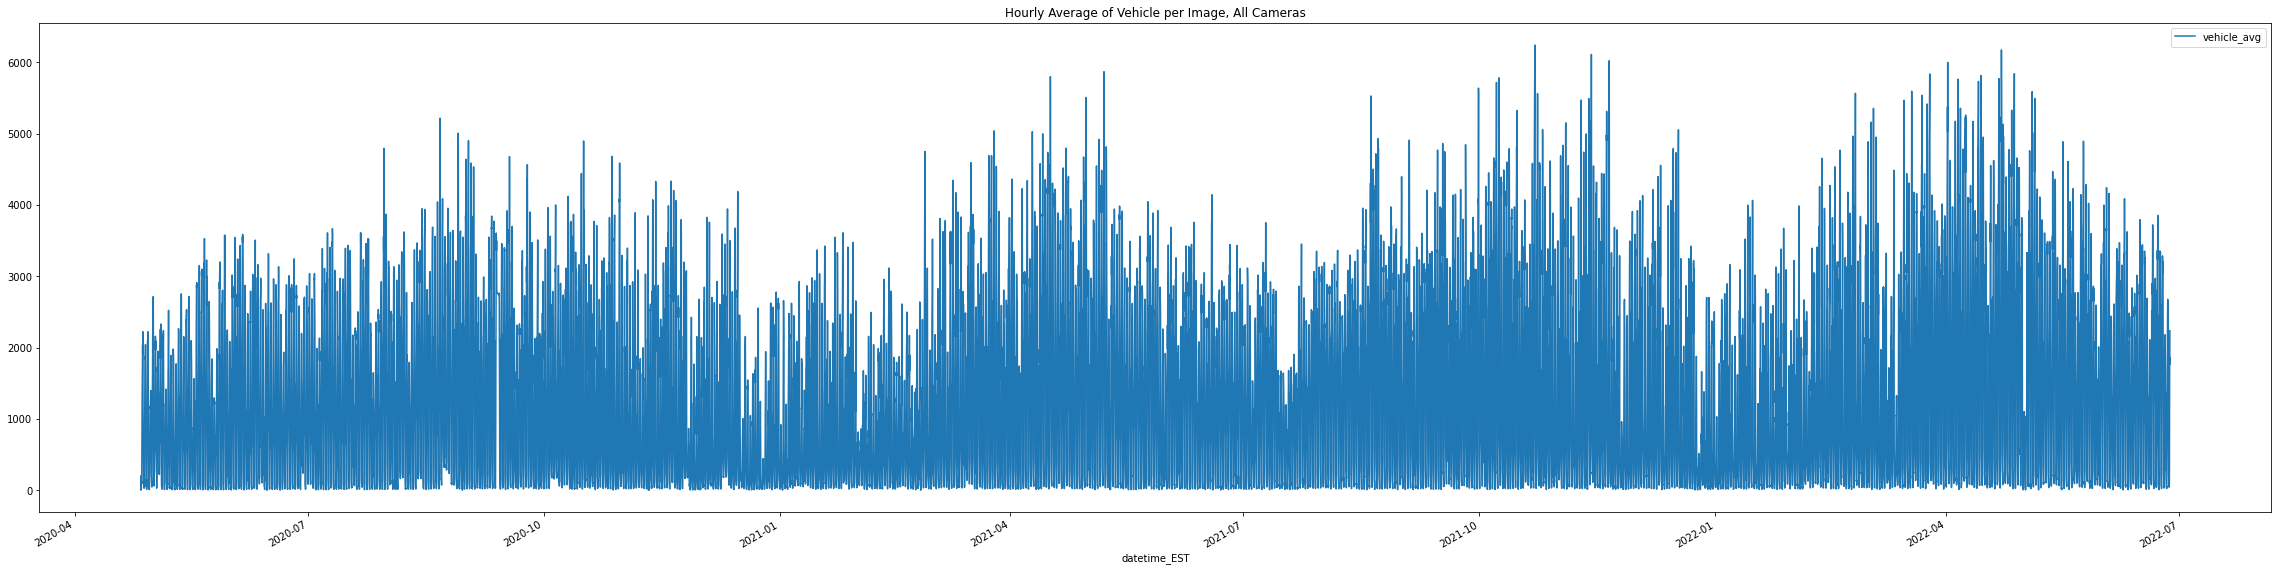

In [25]:
df_sampledh['datetime_EST'] = pd.to_datetime(df_sampledh['datetime_EST'])
df_sampledh.sort_values(by='datetime_EST')
df_sampledh.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicle per Image, All Cameras")

In [26]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
18972 2022-06-27 05:00:00            336       1758   252.286689   5   0
18973 2022-06-27 06:00:00           1297       1695  1010.053097   6   0
18974 2022-06-27 07:00:00           2381       1691  1858.616203   7   0
18975 2022-06-27 08:00:00           2224       1664  1764.230769   8   0
18976 2022-06-27 09:00:00            122         72  2236.666667   9   0

[18977 rows x 6 columns]

In [27]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-04-26 00:00:00') & (df_sampledh['datetime_EST'] < '2022-06-27 00:00:00')]

In [28]:
sds

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
18962 2022-06-26 19:00:00           2424       1698  1884.381625  19   6
18963 2022-06-26 20:00:00           1877       1699  1458.293114  20   6
18964 2022-06-26 21:00:00            551       1740   418.000000  21   6
18965 2022-06-26 22:00:00            265       1716   203.846154  22   6
18966 2022-06-26 23:00:00            165       1698   128.268551  23   6

[18967 rows x 6 columns]

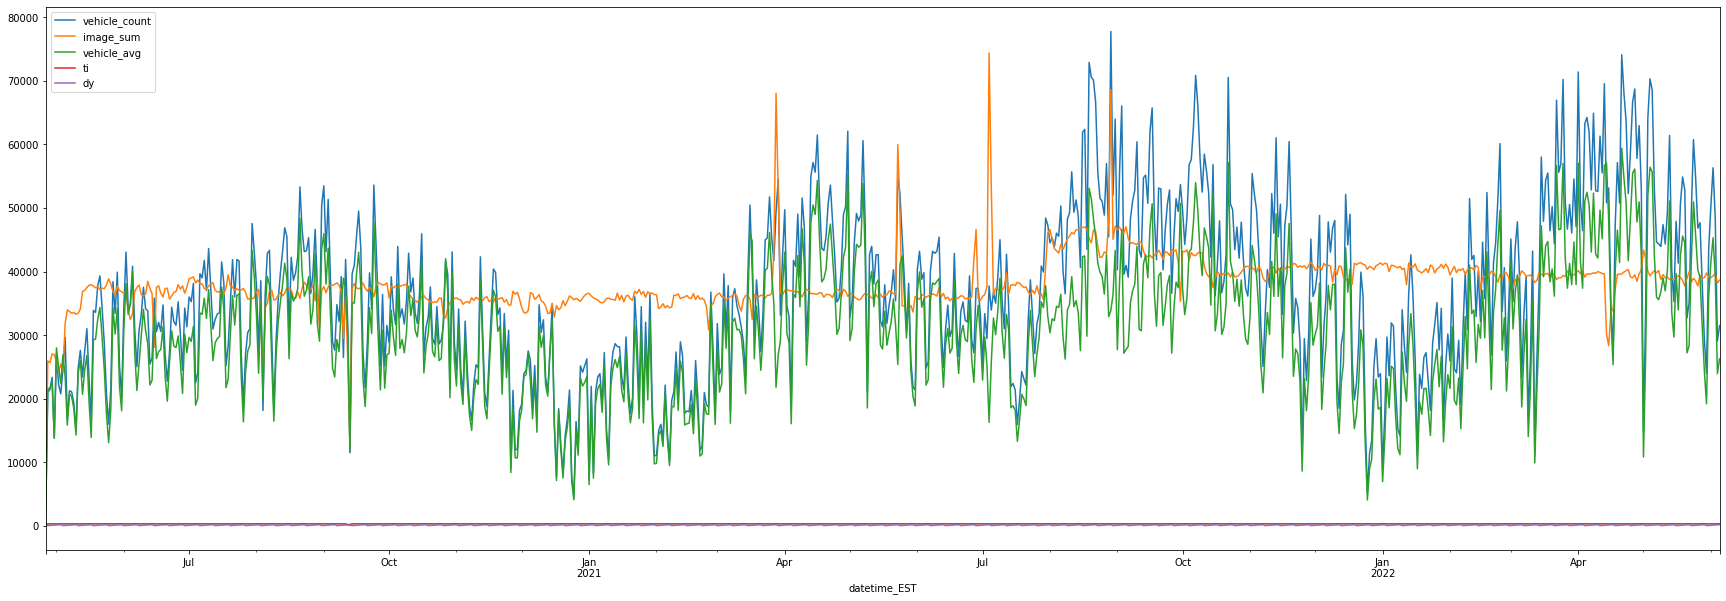

In [31]:
ddcdf = sds.groupby([pd.Grouper(key='datetime_EST',freq='D')]).sum().plot(figsize=(30,10))

In [29]:
ddcdf = sds.groupby([pd.Grouper(key='datetime_EST',freq='D')]).sum()

In [30]:
ddcdf

vehicle_count  image_sum   vehicle_avg   ti   dy
datetime_EST                                                  
2020-04-26              193       2338    289.313338   86   24
2020-04-27            20972      25921  21426.515528  276    0
2020-04-28            21403      25647  21684.807069  276   24
2020-04-29            23344      27016  22479.335516  276   48
2020-04-30            13765      26869  13785.600425  276   72
...                     ...        ...           ...  ...  ...
2022-06-22            49991      39883  40596.298839  276   48
2022-06-23            46854      39732  37959.073429  276   72
2022-06-24            49530      40288  39855.039620  276   96
2022-06-25            27994      40021  22439.360168  276  120
2022-06-26            36974      40537  29310.760956  276  144

[792 rows x 5 columns]

In [39]:
ddcdf

vehicle_count  image_sum   vehicle_avg   ti   dy    moving_avg
datetime_EST                                                                
2020-04-26              193       2338    289.313338   86   24           NaN
2020-04-27            20972      25921  21426.515528  276    0           NaN
2020-04-28            21403      25647  21684.807069  276   24           NaN
2020-04-29            23344      27016  22479.335516  276   48  18936.699968
2020-04-30            13765      26869  13785.600425  276   72  22092.886154
...                     ...        ...           ...  ...  ...           ...
2022-06-22            49991      39883  40596.298839  276   48  34132.425493
2022-06-23            46854      39732  37959.073429  276   72  35172.969257
2022-06-24            49530      40288  39855.039620  276   96           NaN
2022-06-25            27994      40021  22439.360168  276  120           NaN
2022-06-26            36974      40537  29310.760956  276  144           NaN

[792 rows x 6 columns]

In [40]:
ddcdf.to_csv("daily_vehicles.csv",index=False)

In [ ]:
ddf.plot(figsize=(30,10))

In [32]:
ddcdf['moving_avg'] = ddcdf['vehicle_avg'].rolling(window=7,center=True).mean() 

In [33]:
sdcdf = ddcdf[['vehicle_avg','moving_avg']]

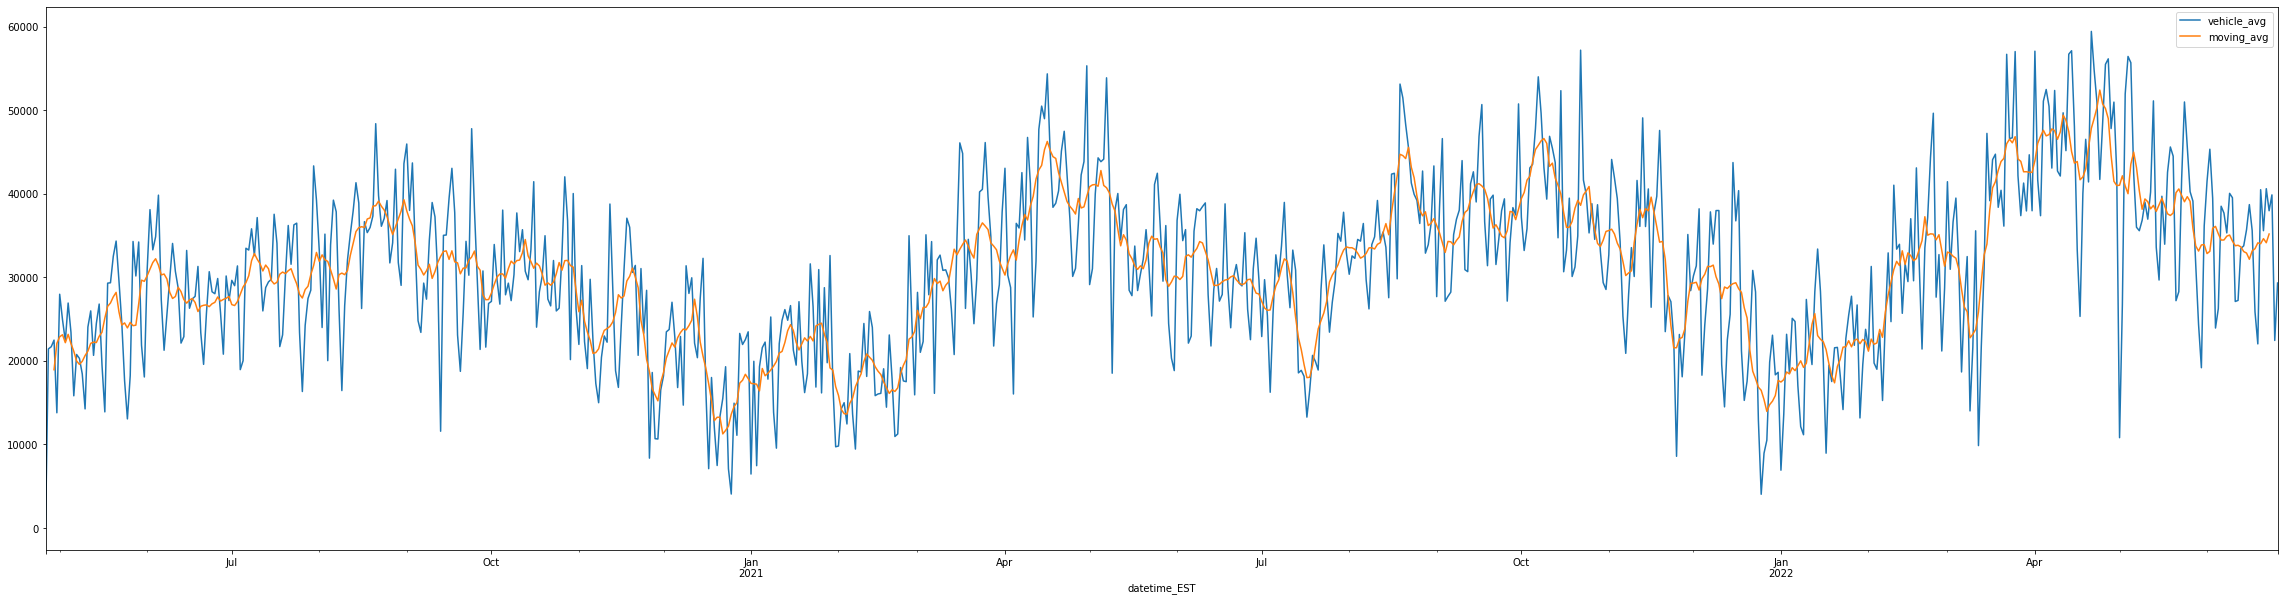

In [34]:
sdcdf.plot(figsize=(40,10))

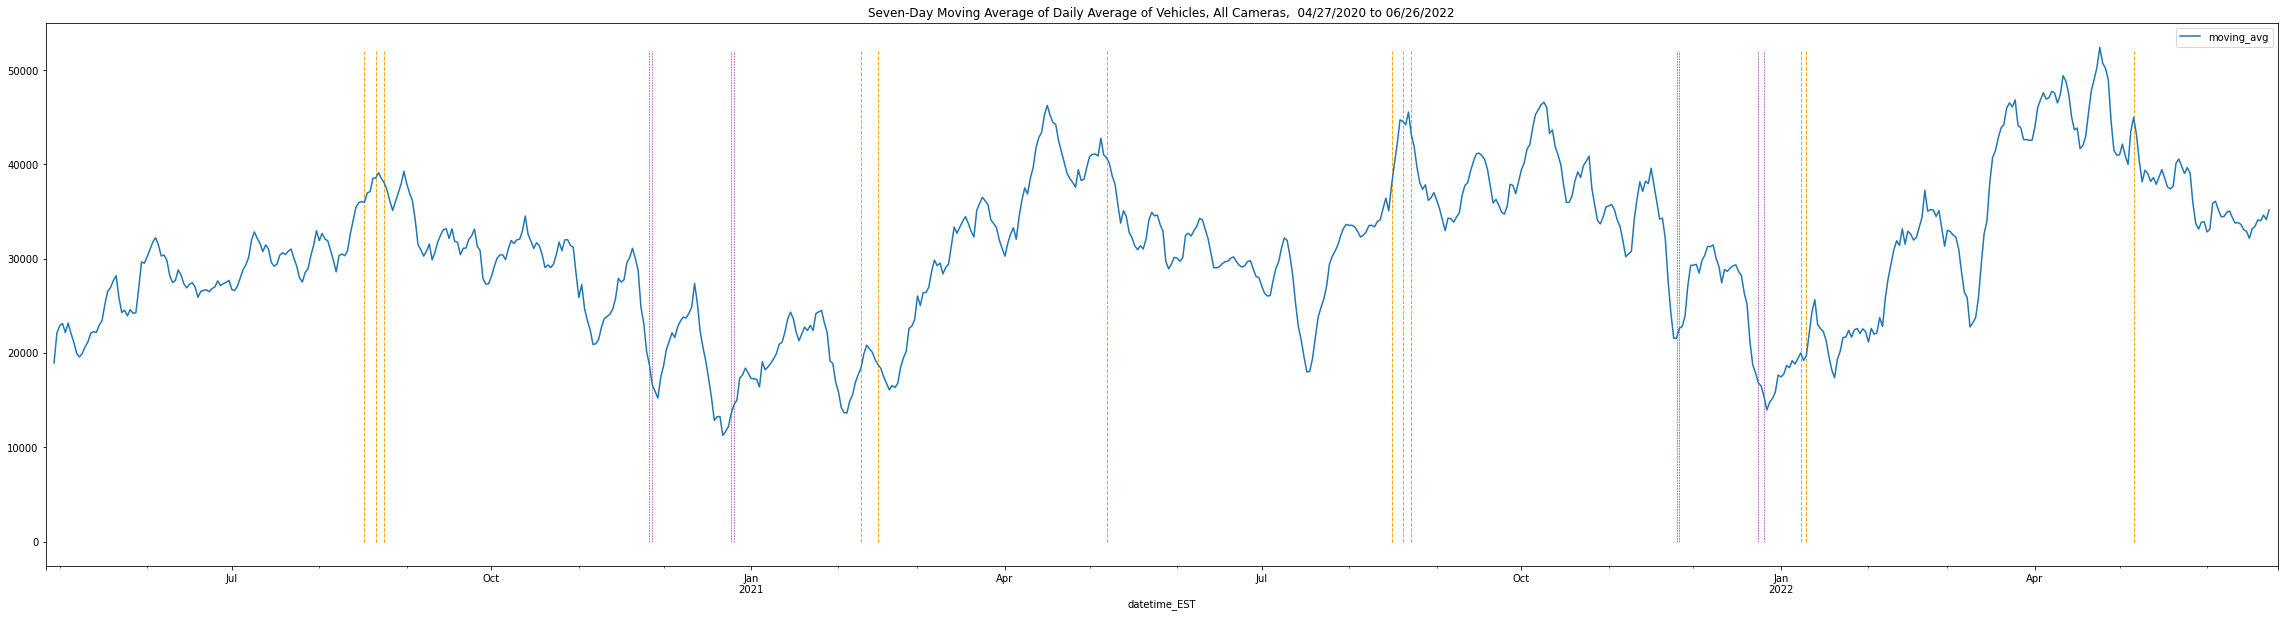

In [35]:
ax = sdcdf.plot( y='moving_avg', kind = 'line',figsize=(40,10),title="Seven-Day Moving Average of Daily Average of Vehicles, All Cameras,  04/27/2020 to 06/26/2022")
y_min = 0
y_max = 52000

plt.vlines(x=['2020-11-26 00:00:00','2020-11-27 00:00:00','2020-12-25 00:00:00','2020-12-26 00:00:00','2021-11-25 00:00:00','2021-11-26 00:00:00','2021-12-24 00:00:00','2021-12-26 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2020-08-24 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00','2021-05-07 00:00:00','2022-01-10 00:00:00','2022-01-08 00:00:00','2022-05-06 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

In [67]:
swcdf

vehicle_avg
datetime_EST               
2020-04-26       289.313338
2020-05-03    154650.203077
2020-05-10    139886.339661
2020-05-17    155339.358319
2020-05-24    197338.663282
...                     ...
2022-05-01    312004.145550
2022-05-08    304736.652336
2022-05-15    267312.712786
2022-05-22    261742.097135
2022-05-29    273573.064321

[110 rows x 1 columns]

In [38]:
swcdf.vehicle_avg

NameError: name 'swcdf' is not defined

In [74]:
sgrv['weekly_vehicles'] = swcdf.vehicle_avg

In [36]:
sgrv = pd.read_csv("xdf.csv",index_col='datetime_EST',parse_dates=True)

In [37]:
sgrv

raw_visit_sums
datetime_EST                
2018-01-01             33671
2018-01-08             88799
2018-01-15             89196
2018-01-22             93661
2018-01-29             90717
...                      ...
2022-03-28            104059
2022-04-04            109397
2022-04-11            103173
2022-04-18            116237
2022-04-25             97331

[226 rows x 1 columns]

In [ ]:
# so either, sum daily vehicles into "weeks" that match SG data
# or... plot SG weekly on daily rows?

In [106]:
df3 = pd.concat([sgrv, swcdf]).sort_values('datetime_EST')

In [88]:
df3

raw_visit_sums    vehicle_avg
datetime_EST                               
2018-01-01           33671.0            NaN
2018-01-08           88799.0            NaN
2018-01-15           89196.0            NaN
2018-01-22           93661.0            NaN
2018-01-29           90717.0            NaN
...                      ...            ...
2022-05-01               NaN  312004.145550
2022-05-08               NaN  304736.652336
2022-05-15               NaN  267312.712786
2022-05-22               NaN  261742.097135
2022-05-29               NaN  273573.064321

[336 rows x 2 columns]

In [107]:
df3.fillna(0)

raw_visit_sums    vehicle_avg
datetime_EST                               
2018-01-01           33671.0       0.000000
2018-01-08           88799.0       0.000000
2018-01-15           89196.0       0.000000
2018-01-22           93661.0       0.000000
2018-01-29           90717.0       0.000000
...                      ...            ...
2022-05-01               0.0  312004.145550
2022-05-08               0.0  304736.652336
2022-05-15               0.0  267312.712786
2022-05-22               0.0  261742.097135
2022-05-29               0.0  273573.064321

[336 rows x 2 columns]

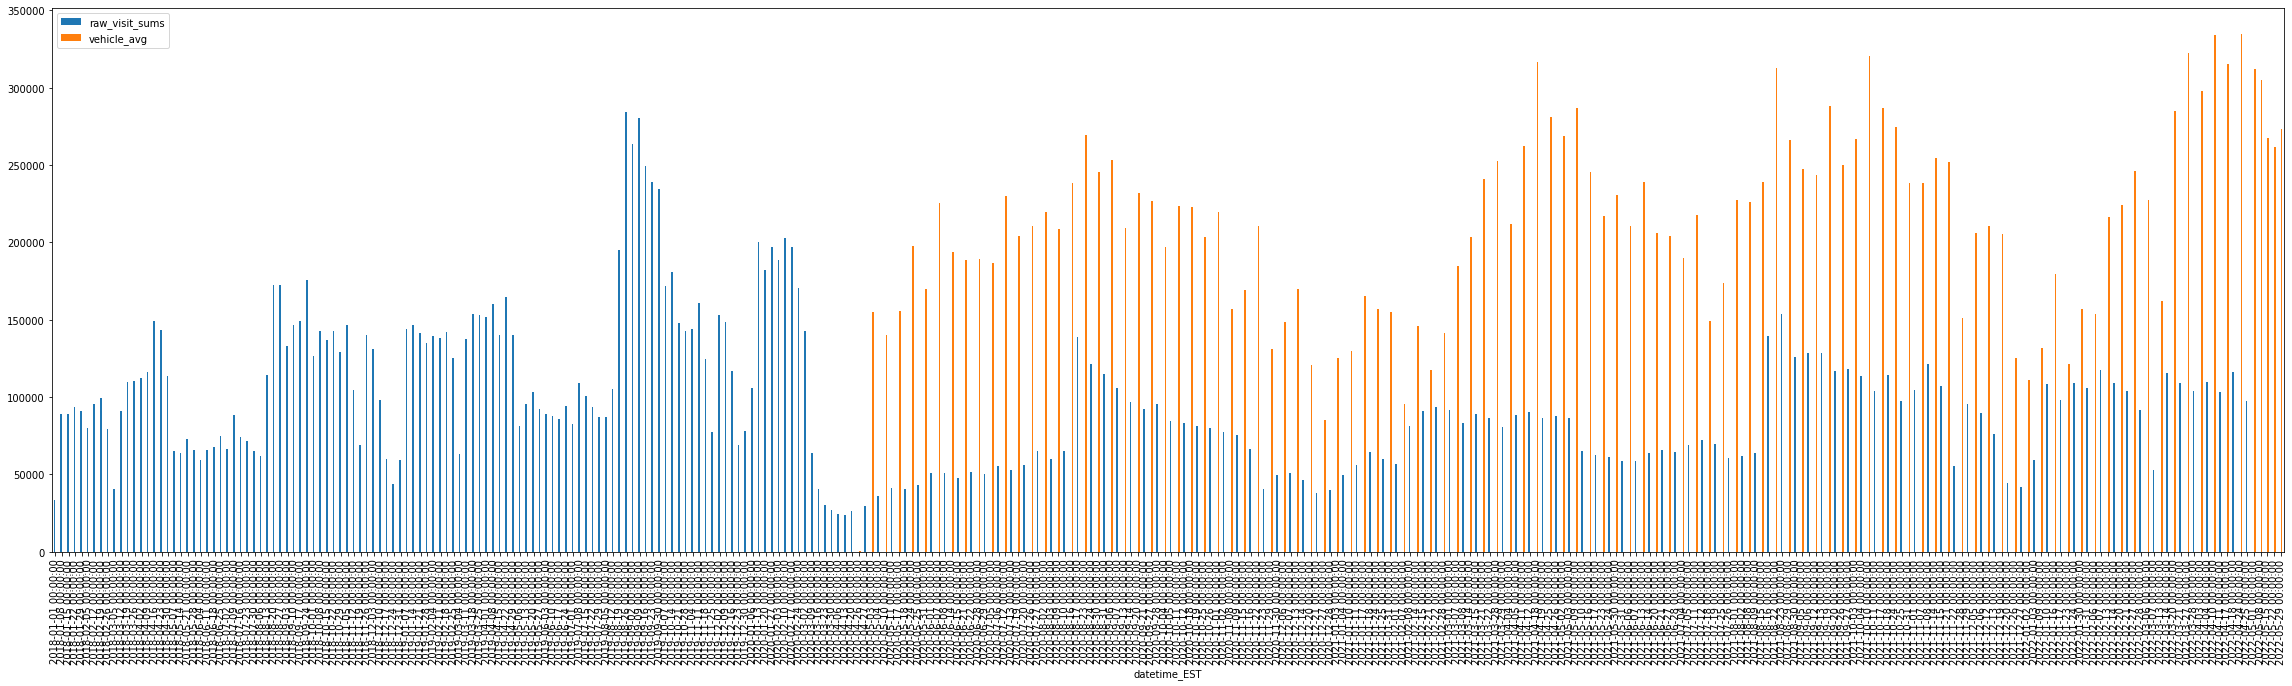

In [108]:
df3.plot.bar(figsize=(40,10))

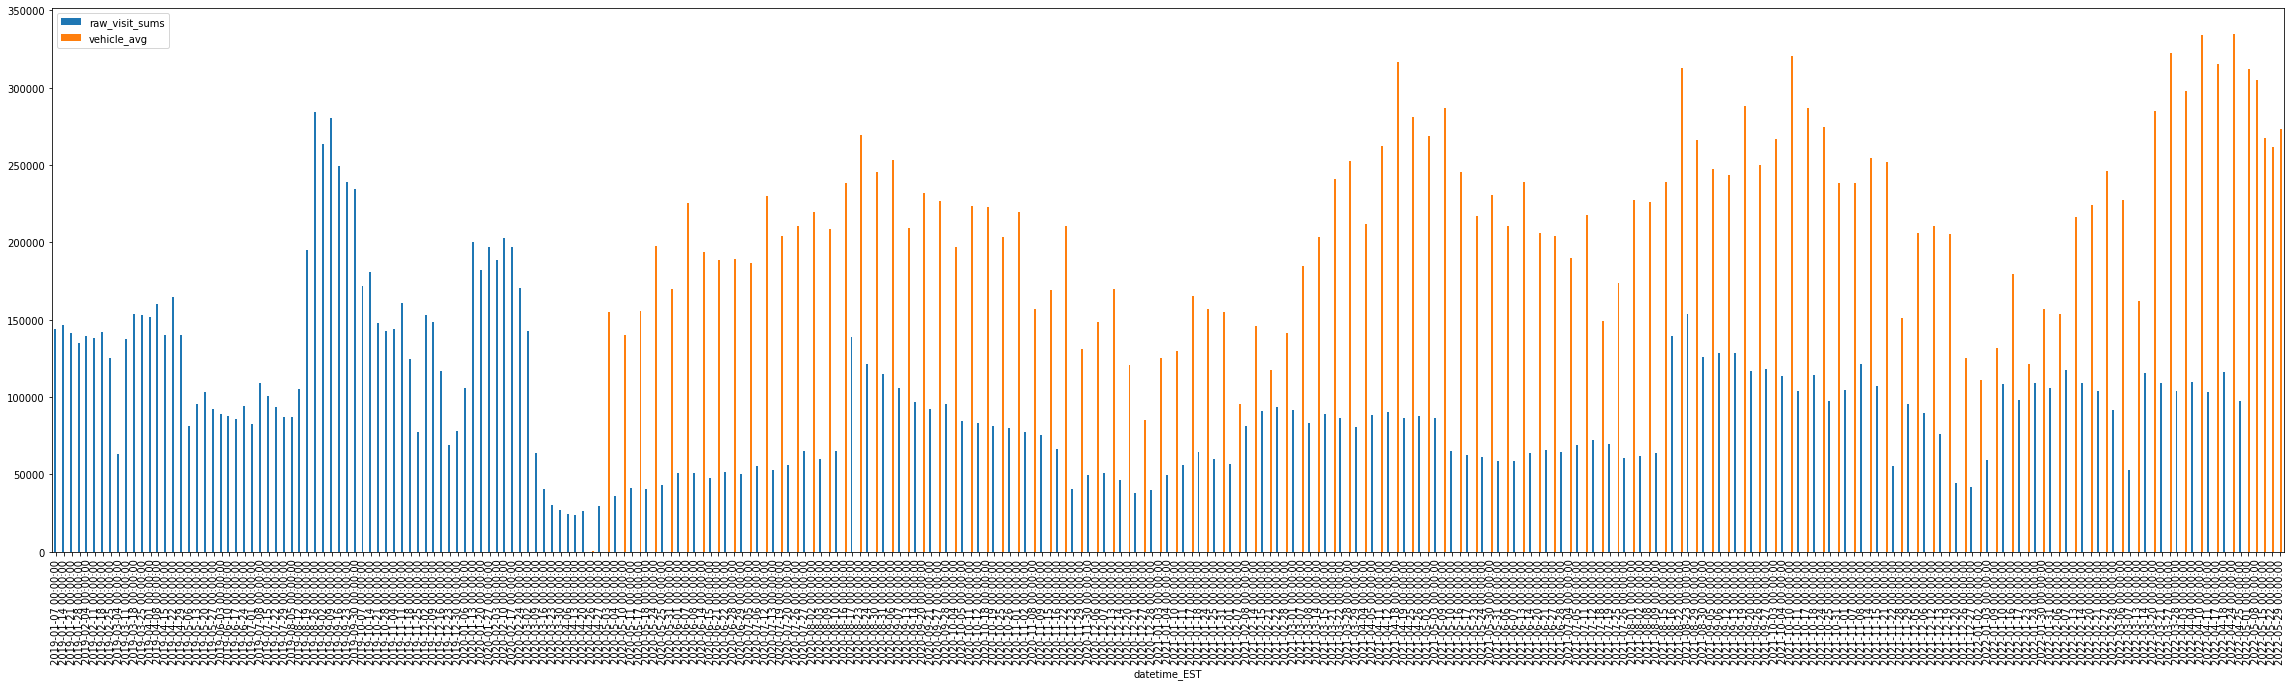

In [100]:
df4.plot.bar(figsize=(40,10))

In [98]:
df4 = df3[df3.index > "2019-01-01"]

In [105]:
df4.tail(60)

raw_visit_sums    vehicle_avg
datetime_EST                               
2021-10-18          114200.0            NaN
2021-10-24               NaN  274412.140128
2021-10-25           97699.0            NaN
2021-10-31               NaN  238341.844191
2021-11-01          104274.0            NaN
2021-11-07               NaN  238592.884764
2021-11-08          121086.0            NaN
2021-11-14               NaN  254317.299034
2021-11-15          107315.0            NaN
2021-11-21               NaN  252139.502991
2021-11-22           55240.0            NaN
2021-11-28               NaN  151020.754485
2021-11-29           95534.0            NaN
2021-12-05               NaN  205789.068660
2021-12-06           89802.0            NaN
2021-12-12               NaN  210410.071197
2021-12-13           75784.0            NaN
2021-12-19               NaN  205415.894052
2021-12-20           44059.0            NaN
2021-12-26               NaN  125014.842631
2021-12-27           41617.0            NaN
2022-01-02               NaN  110888.458513
2022-01-03           59375.0            NaN
2022-01-09               NaN  131798.048262
2022-01-10          108315.0            NaN
2022-01-16               NaN  179543.790125
2022-01-17           98358.0            NaN
2022-01-23               NaN  121575.204764
2022-01-24          108933.0            NaN
2022-01-30               NaN  157115.234099
2022-01-31          106042.0            NaN
2022-02-06               NaN  153899.592239
2022-02-07          117174.0            NaN
2022-02-13               NaN  216474.527713
2022-02-14          108753.0            NaN
2022-02-20               NaN  223806.957026
2022-02-21          103966.0            NaN
2022-02-27               NaN  246130.008532
2022-02-28           91471.0            NaN
2022-03-06               NaN  227605.115963
2022-03-07           52797.0            NaN
2022-03-13               NaN  162338.199939
2022-03-14          115409.0            NaN
2022-03-20               NaN  284958.929596
2022-03-21          108813.0            NaN
2022-03-27               NaN  322591.278234
2022-03-28          104059.0            NaN
2022-04-03               NaN  297857.318920
2022-04-04          109397.0            NaN
2022-04-10               NaN  334229.751153
2022-04-11          103173.0            NaN
2022-04-17               NaN  315229.870815
2022-04-18          116237.0            NaN
2022-04-24               NaN  334729.260889
2022-04-25           97331.0            NaN
2022-05-01               NaN  312004.145550
2022-05-08               NaN  304736.652336
2022-05-15               NaN  267312.712786
2022-05-22               NaN  261742.097135
2022-05-29               NaN  273573.064321

In [90]:
sgrv

raw_visit_sums
datetime_EST                
2018-01-01             33671
2018-01-08             88799
2018-01-15             89196
2018-01-22             93661
2018-01-29             90717
...                      ...
2022-03-28            104059
2022-04-04            109397
2022-04-11            103173
2022-04-18            116237
2022-04-25             97331

[226 rows x 1 columns]

In [91]:
swcdf

vehicle_avg
datetime_EST               
2020-04-26       289.313338
2020-05-03    154650.203077
2020-05-10    139886.339661
2020-05-17    155339.358319
2020-05-24    197338.663282
...                     ...
2022-05-01    312004.145550
2022-05-08    304736.652336
2022-05-15    267312.712786
2022-05-22    261742.097135
2022-05-29    273573.064321

[110 rows x 1 columns]

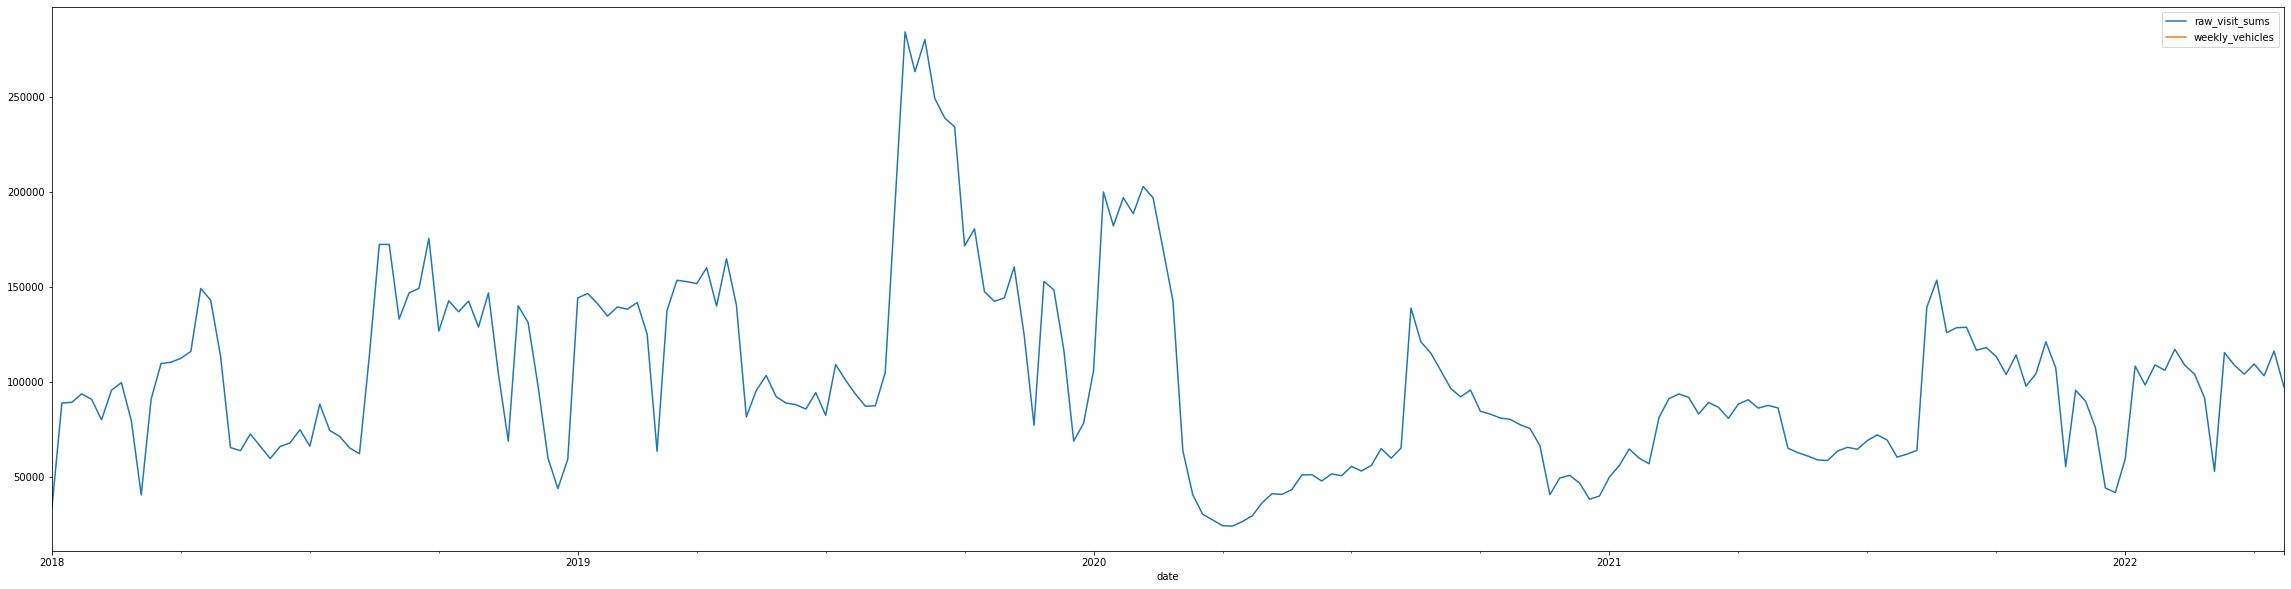

In [75]:
sgrv.plot(figsize=(40,10))

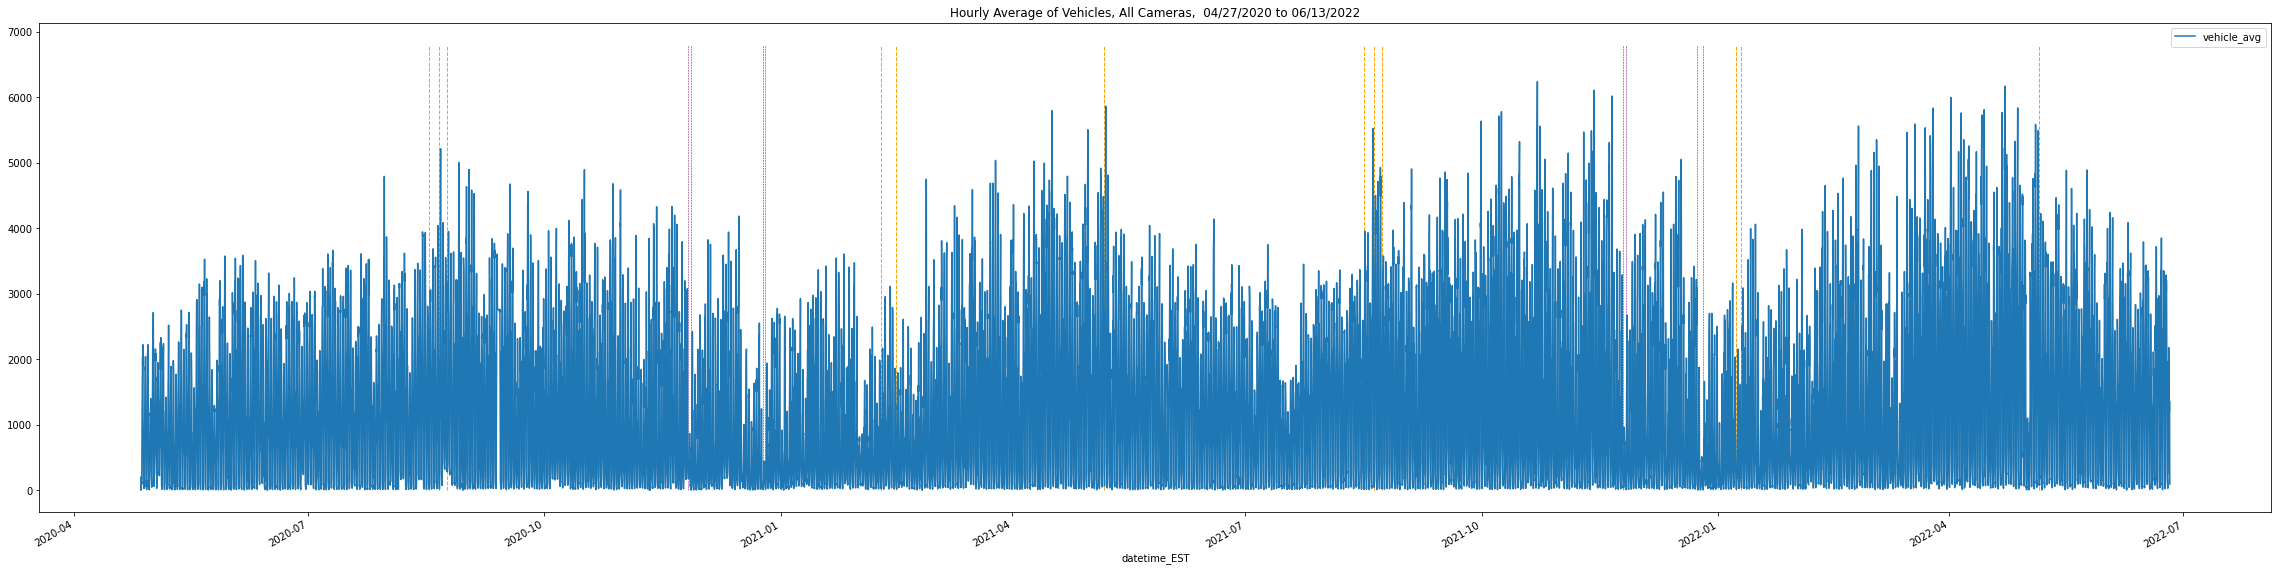

In [41]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2020-04-26 00:00:00') & (df_sampledh['datetime_EST'] < '2022-06-26 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  04/27/2020 to 06/13/2022")
y_min = 0
y_max = 6800

plt.vlines(x=['2020-11-26 00:00:00','2020-11-27 00:00:00','2020-12-25 00:00:00','2020-12-26 00:00:00','2021-11-25 00:00:00','2021-11-26 00:00:00','2021-12-24 00:00:00','2021-12-26 00:00:00'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=0.5, label='vline_multiple')
plt.vlines(x=['2020-08-17 00:00:00','2020-08-21 00:00:00','2020-08-24 00:00:00','2021-02-09 00:00:00','2021-02-15 00:00:00','2021-05-07 00:00:00','2022-01-10 00:00:00','2022-01-08 00:00:00','2022-05-06 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

plt.vlines(x=['2021-08-16 00:00:00','2021-08-20 00:00:00','2021-08-23 00:00:00'], ymin=y_min, ymax=y_max, colors='orange', ls='--', lw=1, label='vline_multiple')

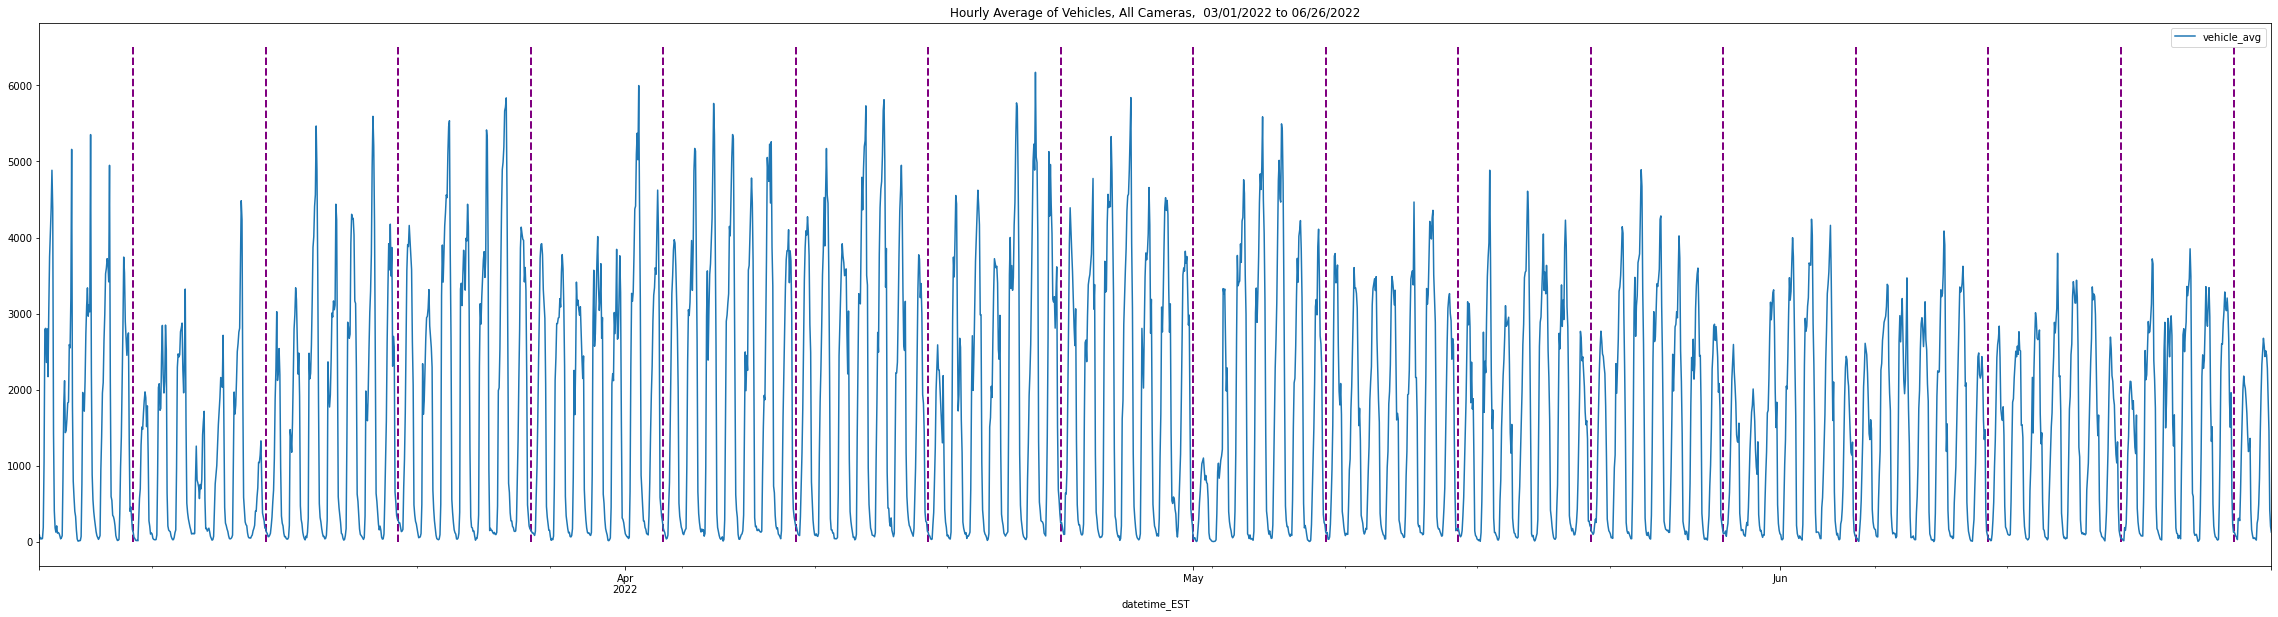

In [42]:
sds = df_sampledh[(df_sampledh['datetime_EST'] > '2022-03-01 00:00:00') & (df_sampledh['datetime_EST'] < '2022-06-27 00:00:00')]
ax = sds.plot(x ='datetime_EST', y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  03/01/2022 to 06/26/2022")
y_min = sds.vehicle_count.min()
y_max = 6500

plt.vlines(x=['2022-01-02','2022-01-09','2022-01-16','2022-01-23','2022-01-30','2022-02-06','2022-02-13','2022-02-20','2022-02-27','2022-03-06','2022-03-13','2022-03-20',
              '2022-03-27','2022-04-03','2022-04-10','2022-04-17','2022-04-24','2022-05-01','2022-05-01','2022-05-08','2022-05-15','2022-05-22','2022-05-29','2022-06-05','2022-06-12','2022-06-19','2022-06-25'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')


In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [29]:
df_sampledh['datetime_EST'] =  pd.to_datetime(df_sampledh['datetime_EST'])

In [30]:
d2021 = df_sampledh[df_sampledh["datetime_EST"].year == 2021]

AttributeError: 'Series' object has no attribute 'year'

In [34]:
s = df_sampledh.set_index("datetime_EST",inplace=True)

In [66]:
df_sampledh

datetime_EST  vehicle_count  image_sum  vehicle_avg  ti  dy
0     2020-04-26 20:00:00            144        960   198.000000  20   6
1     2020-04-26 21:00:00              0         68     0.000000  21   6
2     2020-04-26 22:00:00             11        516    28.139535  22   6
3     2020-04-26 23:00:00             38        794    63.173804  23   6
4     2020-04-27 00:00:00             77        796   127.688442   0   0
...                   ...            ...        ...          ...  ..  ..
18132 2022-05-23 05:00:00            617       1686   483.060498   5   0
18133 2022-05-23 06:00:00           1233       1670   974.586826   6   0
18134 2022-05-23 07:00:00           1401       1621  1140.851326   7   0
18135 2022-05-23 08:00:00           2871       1618  2342.224969   8   0
18136 2022-05-23 09:00:00            770        477  2130.817610   9   0

[18137 rows x 6 columns]

In [39]:
x = df_sampledh.groupby([df_sampledh.index.year, df_sampledh.index.dayofweek]).cumcount()
shifted = df_sampledh.groupby([x, df_sampledh.index.dayofweek]).shift()

In [40]:
shifted

vehicle_count  image_sum  vehicle_avg   ti   dy
datetime_EST                                                        
2020-04-26 20:00:00            NaN        NaN          NaN  NaN  NaN
2020-04-26 21:00:00            NaN        NaN          NaN  NaN  NaN
2020-04-26 22:00:00            NaN        NaN          NaN  NaN  NaN
2020-04-26 23:00:00            NaN        NaN          NaN  NaN  NaN
2020-04-27 00:00:00            NaN        NaN          NaN  NaN  NaN
...                            ...        ...          ...  ...  ...
2022-05-23 05:00:00         1148.0     3045.0   497.655172  5.0  0.0
2022-05-23 06:00:00         2090.0     2450.0  1126.040816  6.0  0.0
2022-05-23 07:00:00         4633.0     2878.0  2124.933982  7.0  0.0
2022-05-23 08:00:00         4834.0     2917.0  2187.480288  8.0  0.0
2022-05-23 09:00:00         5109.0     2949.0  2286.836216  9.0  0.0

[18137 rows x 5 columns]

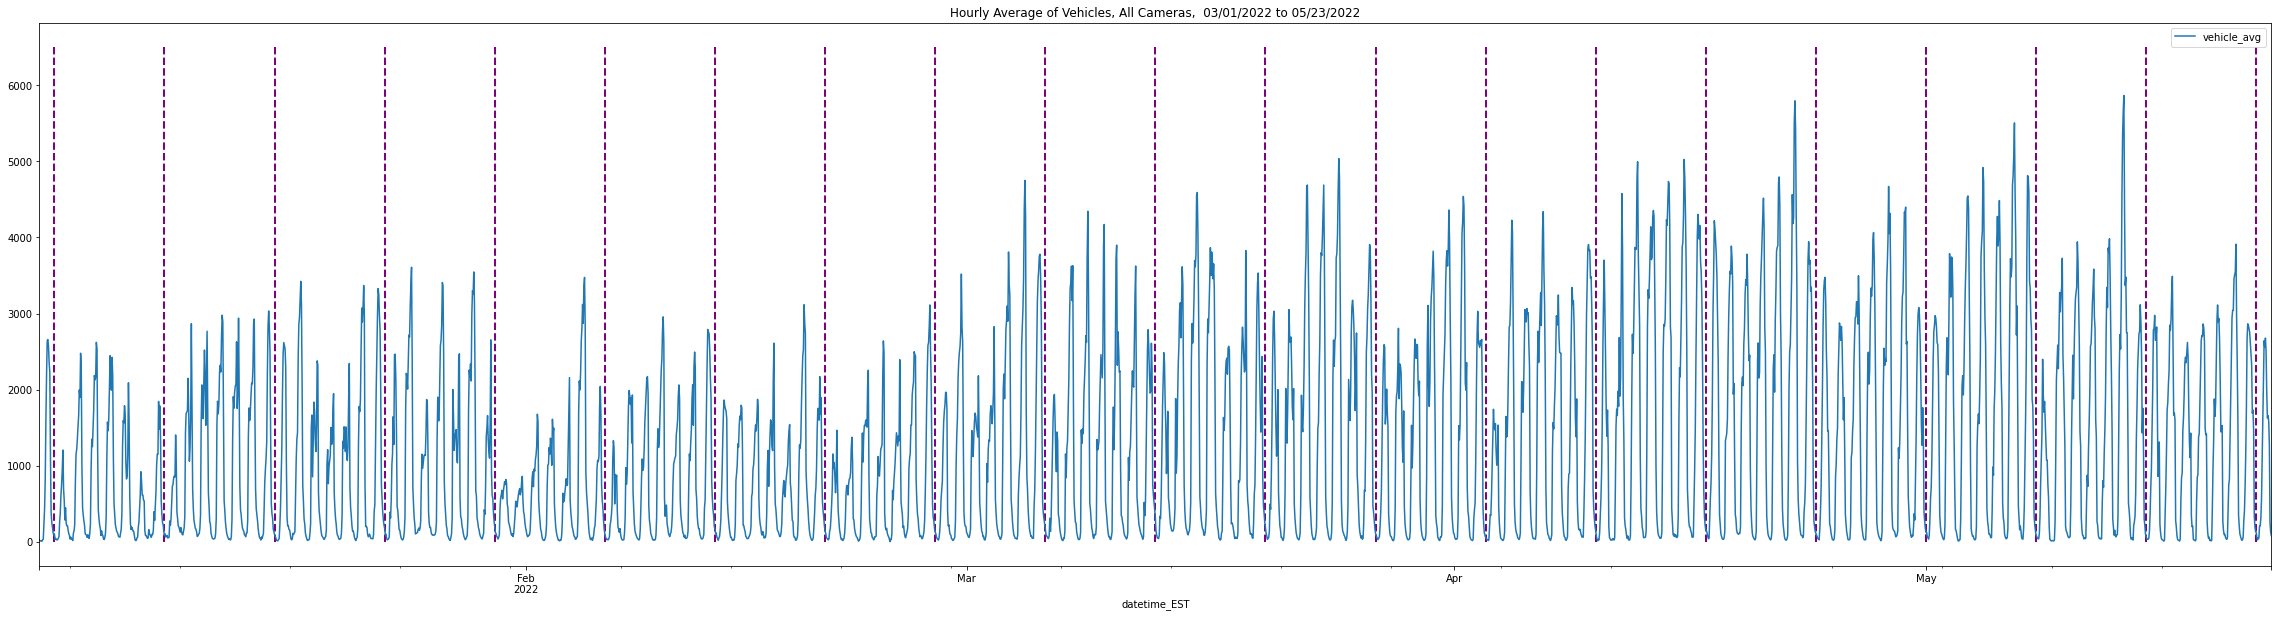

In [44]:
sds = shifted[(shifted.index > '2022-01-01 00:00:00') & (shifted.index < '2022-05-23 00:00:00')]
ax = sds.plot( y='vehicle_avg', kind = 'line',figsize=(40,10),title="Hourly Average of Vehicles, All Cameras,  03/01/2022 to 05/23/2022")
y_min = sds.vehicle_count.min()
y_max = 6500

plt.vlines(x=['2022-01-02','2022-01-09','2022-01-16','2022-01-23','2022-01-30','2022-02-06','2022-02-13','2022-02-20','2022-02-27','2022-03-06','2022-03-13','2022-03-20','2022-03-27','2022-04-03','2022-04-10','2022-04-17','2022-04-24','2022-05-01','2022-05-01','2022-05-08','2022-05-15','2022-05-22'], ymin=y_min, ymax=y_max, colors='purple', ls='--', lw=2, label='vline_multiple')
